<a href="https://colab.research.google.com/github/Kafleavinash/Machinelearning_soil/blob/main/latest_train_test_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
import shap
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving combined_excel_files_Ranzo_anthoall.csv to combined_excel_files_Ranzo_anthoall (1).csv


In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/combined_excel_files_Ranzo_anthoall.csv')

# Check structure
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SAMPLEDATE       754 non-null    object 
 1   lati             705 non-null    float64
 2   long             705 non-null    float64
 3   OM               769 non-null    float64
 4   Sensor_OM        528 non-null    float64
 5   Elevation        769 non-null    float64
 6   Relative_Elev    769 non-null    float64
 7   Slope            769 non-null    float64
 8   Aspect           768 non-null    float64
 9   Profile_curva    769 non-null    float64
 10  Tang_curva       769 non-null    float64
 11  Senti_BI_1       769 non-null    float64
 12  Senti_BI_2       769 non-null    float64
 13  Plant_BI_1       767 non-null    object 
 14  Plant_BI_2       766 non-null    float64
 15  Polaris_SC       772 non-null    object 
 16  Gnasco_SC        743 non-null    float64
 17  MRVBF           

In [4]:
# Drop the dependent variable from the dataset to get the features (X)
X = df.drop(columns=["OM"])  # <-- replace with actual column name if different

# Select the dependent variable (y)
y = df["OM"]


In [5]:
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
   SAMPLEDATE    lati    long  Sensor_OM   Elevation  Relative_Elev     Slope  \
0  2022-06-08  44.384 -94.121  14.375940  301.890015       6.350006  0.226563   
1  2022-06-08  44.383 -94.121  14.698011  300.839996       5.299988  1.450022   
2  2022-06-08  44.382 -94.121  13.548349  300.109985       4.569977  1.114162   
3  2022-06-08  44.381 -94.121  11.478357  298.589996       3.049988  0.143161   
4  2022-06-08  44.376 -94.121  14.951053  300.179993       4.639984  2.481674   

       Aspect  Profile_curva  Tang_curva  ...  ncci3all  aws_5_20s  aws_0_20s  \
0  288.504852      -0.031094   -0.042257  ...  0.923500  30.398750  40.537502   
1  237.093048      -0.080120   -0.019543  ...  0.925719  30.609375  40.818752   
2  224.984100      -0.061876   -0.037807  ...  0.890437  29.766872  39.693752   
3   90.087471      -0.032168   -0.077811  ...  0.817703  27.923904  37.232815   
4   33.235489       0.026937    0.043010  ...  0.817500  27.660000  36.949997   


In [6]:
df_m = df

In [7]:
df_m.head()

SAMPLEDATE    lati    long    OM  Sensor_OM   Elevation  Relative_Elev  \
0  2022-06-08  44.384 -94.121  4.79  14.375940  301.890015       6.350006   
1  2022-06-08  44.383 -94.121  6.39  14.698011  300.839996       5.299988   
2  2022-06-08  44.382 -94.121  5.19  13.548349  300.109985       4.569977   
3  2022-06-08  44.381 -94.121  4.10  11.478357  298.589996       3.049988   
4  2022-06-08  44.376 -94.121  5.89  14.951053  300.179993       4.639984   

      Slope      Aspect  Profile_curva  ...  ncci3all  aws_5_20s  aws_0_20s  \
0  0.226563  288.504852      -0.031094  ...  0.923500  30.398750  40.537502   
1  1.450022  237.093048      -0.080120  ...  0.925719  30.609375  40.818752   
2  1.114162  224.984100      -0.061876  ...  0.890437  29.766872  39.693752   
3  0.143161   90.087471      -0.032168  ...  0.817703  27.923904  37.232815   
4  2.481674   33.235489       0.026937  ...  0.817500  27.660000  36.949997   

  Alpha_Polaris  HB_Polaris Ksat_Polaris  Lamda_Polaris n_Polaris  \
0     -0.541326    0.540738     0.070757       0.272734  1.272823   
1     -0.474751    0.471772     0.087588       0.268868  1.272783   
2     -0.468867    0.470007     0.400059       0.298882  1.310815   
3     -0.331342    0.351205    -0.025279       0.276871  1.282627   
4     -0.563506    0.561508     0.017968       0.269403  1.268121   

   Theta_r_Polaris  Theta_s_Polaris  
0         0.095672         0.507608  
1         0.093282         0.547380  
2         0.078316         0.501798  
3         0.088348         0.564284  
4         0.102729         0.496735  

[5 rows x 36 columns]

In [8]:
df_m.shape

(777, 36)

In [9]:
df_m.columns

Index(['SAMPLEDATE', 'lati', 'long', 'OM', 'Sensor_OM', 'Elevation',
       'Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Tang_curva',
       'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC',
       'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris',
       'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc',
       'ncci3all', 'aws_5_20s', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris',
       'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris',
       'Theta_s_Polaris'],
      dtype='object')

RANDOM FOREST

Model: RandomForestRegressor
Setup: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV:
MBE=0.0245, MAE=1.3309, RMSE=1.9308, R²=0.5774


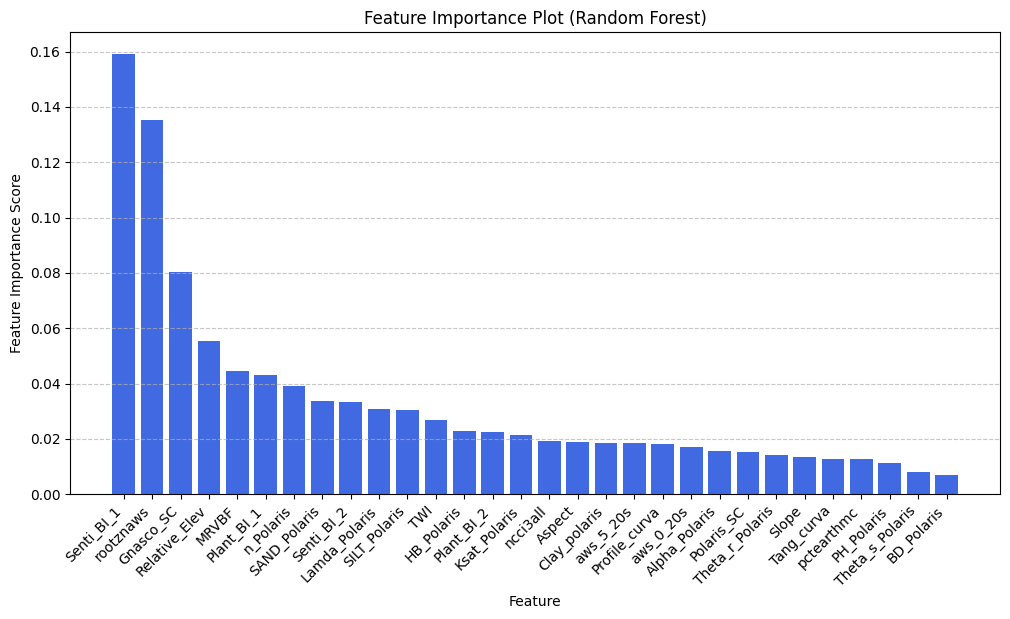

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib.pyplot
from sklearn.model_selection import KFold, GridSearchCV  # Import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Handle missing values in y
# Remove rows with NaN in 'OM' column:

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #

# Define the hyperparameter grid


# Initialize model
rf = RandomForestRegressor(random_state=42)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit the GridSearchCV object to your data to find the best hyperparameters
# This line is added to perform the grid search before accessing best_params_
#.fit(X_scaled, y)

# Get the best hyperparameters and model
#best_params = grid_search.best_params_
#(f"Best Hyperparameters: {best_params}")
#best_rf_model = grid_search.best_estimator_

# ... (Rest of your code using best_rf_model for evaluation) ...

# ... (Perform cross-validation using best_rf_model) ...

# ... (Calculate and print average metrics) ...

# ... (Create DataFrame and plot feature importance using best_rf_model) ...

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



    # Train model
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: RandomForestRegressor")
print(f"Setup: {rf.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_rf = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_pred
})


# Extract feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns  # Get the feature names

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Random Forest)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

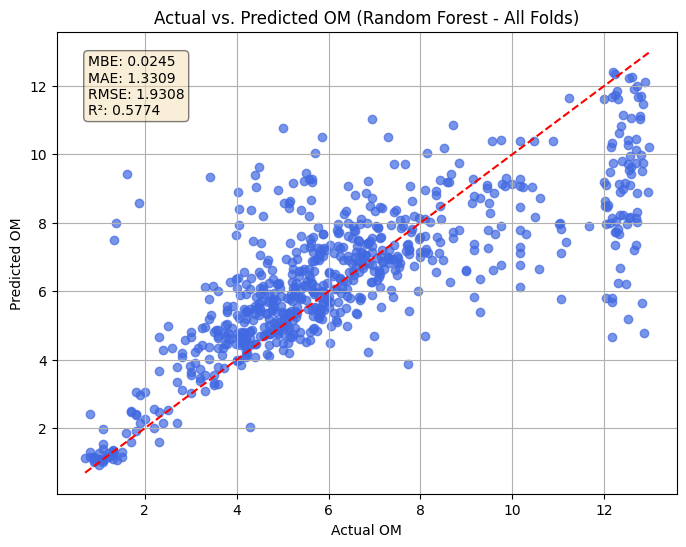

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (Random Forest - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

RFE_RANDOM FOREST

Selected Top 90% Features (21 out of 30):
['Relative_Elev', 'Aspect', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris']
Model: RandomForestRegressor
Setup: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0352, MAE=1.3083, RMSE=1.9032, R²=0.5891


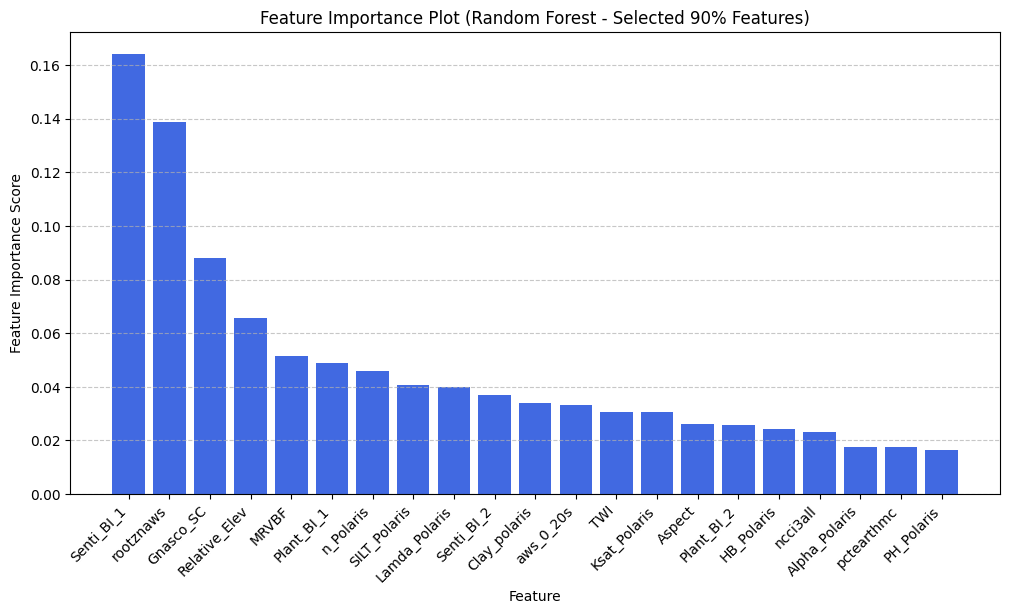

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long','Sensor_OM'])  # Features
y = df_m['OM']  # Target variable



# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Remove rows with NaN in 'OM' column:
X = X[y.notna()]  # Keep rows in X where y is not NaN
y = y.dropna()  # Remove NaN values from y

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.70 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=rf, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []


# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: RandomForestRegressor")
print(f"Setup: {rf.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_rf_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Random Forest - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

With RFE Random FOrest

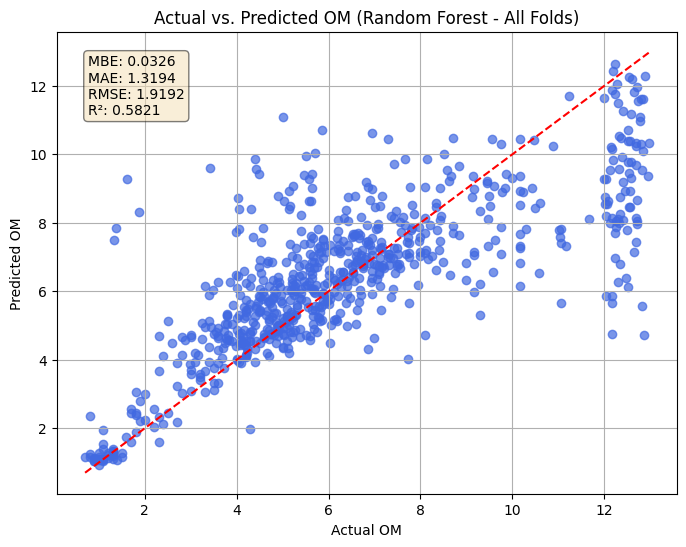

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (Random Forest - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()


✅ Selected Top 90% Features (21 of 30):
['Relative_Elev', 'Slope', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'SAND_Polaris', 'SILT_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris']

📊 Random Forest – 10-Fold Cross-Validation (Train Set):
MBE:  0.0221
MAE:  1.3647
RMSE: 1.9733
R²:   0.5483

🧪 Random Forest – Final Evaluation on Unseen Test Set:
MBE:  0.0136
MAE:  1.4077
RMSE: 1.9413
R²:   0.6331


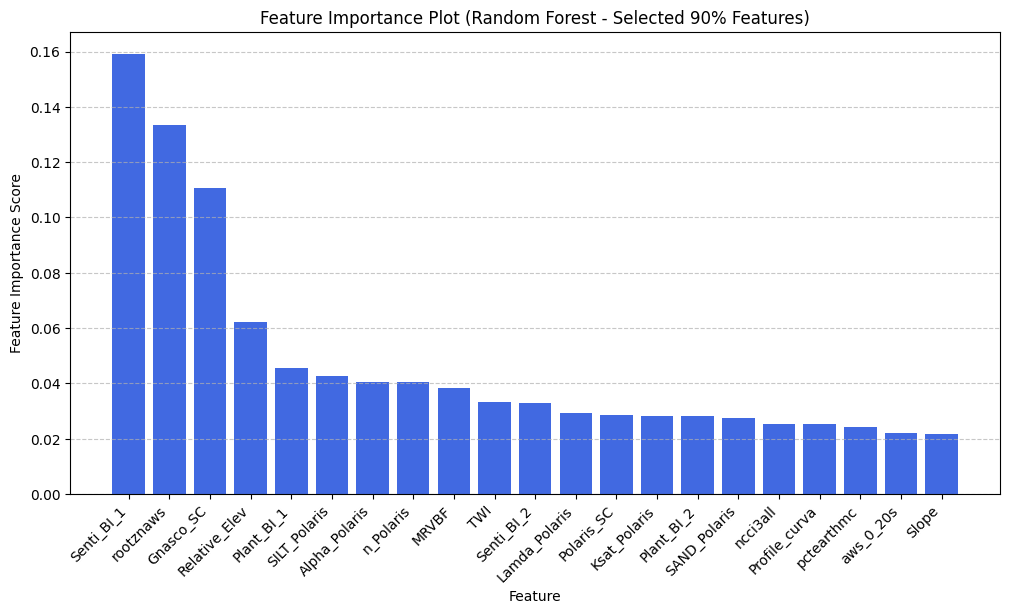

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and clean data
X = df_m.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaN values
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature selection using RFE on training set
rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
num_features_to_select = int(0.7 * X.shape[1])
rfe = RFE(estimator=rf_base, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

# Get selected feature indices
selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X to selected features
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# Initialize model for training
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# ---- 10-Fold CV on Training Set ----
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_index, val_index in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

    rf.fit(X_cv_train, y_cv_train)
    y_cv_pred = rf.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

print(f"\n📊 Random Forest – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# ---- Final Model on Full Training Set + Test Evaluation ----
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)

test_mbe = np.mean(y_test_pred - y_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n🧪 Random Forest – Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ---- Save Predictions ----
df_rf_rfe = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_test_pred
})
# Extract feature importances for the selected features
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Random Forest - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


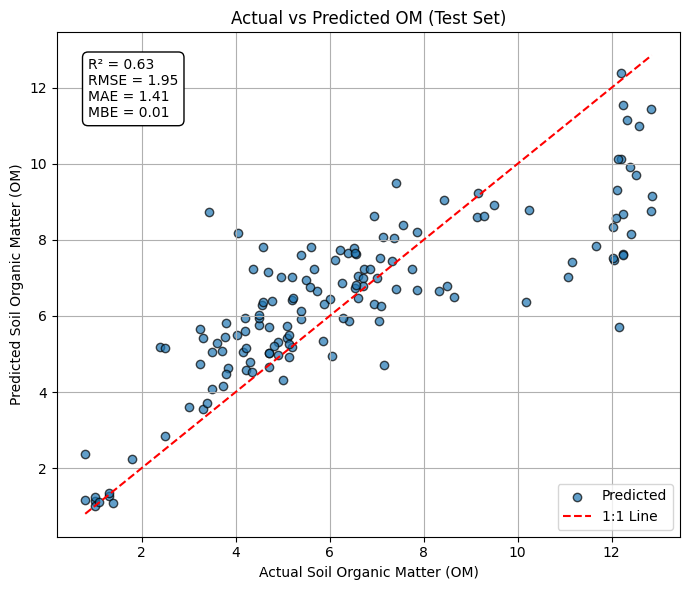

In [ ]:
# 📈 Scatter Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k', label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual Soil Organic Matter (OM)")
plt.ylabel("Predicted Soil Organic Matter (OM)")
plt.title("Actual vs Predicted OM (Test Set)")

# Calculate MBE
test_mbe = np.mean(y_pred_test - y_test)

# Add metrics as text (including MBE)
plt.text(
    0.05, 0.95,
    f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}\nMBE = {test_mbe:.2f}",  # Added MBE here
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Train tezt _CV random forest


📊 Cross-Validation (Train set) Metrics:
MBE:  0.0231
MAE:  1.3749
RMSE: 1.9776
R²:   0.5467

🧪 Test Set (Unseen Data) Metrics:
MBE:  0.0119
MAE:  1.4029
RMSE: 1.9135
R²:   0.6436


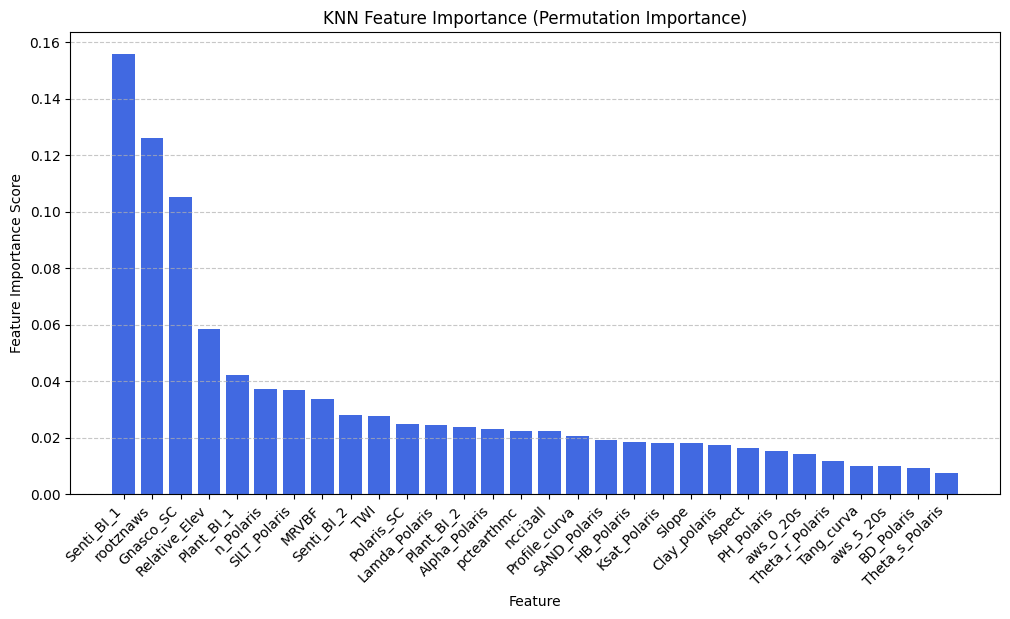

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs in either X or y
df_clean = pd.concat([X, y], axis=1).dropna()
X = df_clean.drop(columns=['OM'])
y = df_clean['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Lists to store training CV metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform CV on training data
for train_index, val_index in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

    rf.fit(X_cv_train, y_cv_train)
    y_cv_pred = rf.predict(X_cv_val)

    # Metrics for CV
    mbe = np.mean(y_cv_pred - y_cv_val)
    mae = mean_absolute_error(y_cv_val, y_cv_pred)
    rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
    r2 = r2_score(y_cv_val, y_cv_pred)

    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Average CV Metrics
print("\n📊 Cross-Validation (Train set) Metrics:")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# Train on full training set
rf.fit(X_train, y_train)

# Predict on test set
y_pred_test = rf.predict(X_test)

# Test Set Evaluation
test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 Test Set (Unseen Data) Metrics:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# Create DataFrame for predictions
df_rf = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_pred_test
})
# Plot feature importance with scores on the y-axis
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.title('KNN Feature Importance (Permutation Importance)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




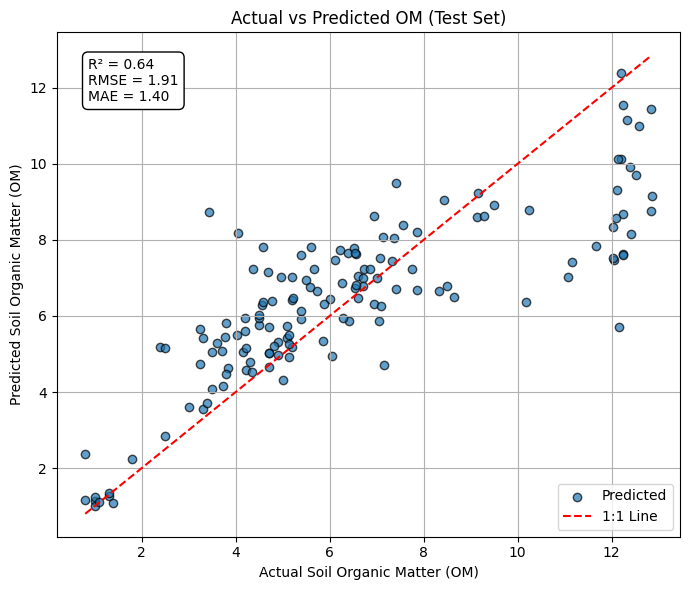

In [ ]:
# 📈 Scatter Plot: Actual vs Predicted (Test Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k', label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual Soil Organic Matter (OM)")
plt.ylabel("Predicted Soil Organic Matter (OM)")
plt.title("Actual vs Predicted OM (Test Set)")

# Add metrics as text
plt.text(
    0.05, 0.95,
    f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


CUBIst

KNN

Model: KNeighborsRegressor
Setup: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Average Metrics Across 10-Fold CV:
MBE=-0.0444, MAE=1.4460, RMSE=2.0598, R²=0.5226


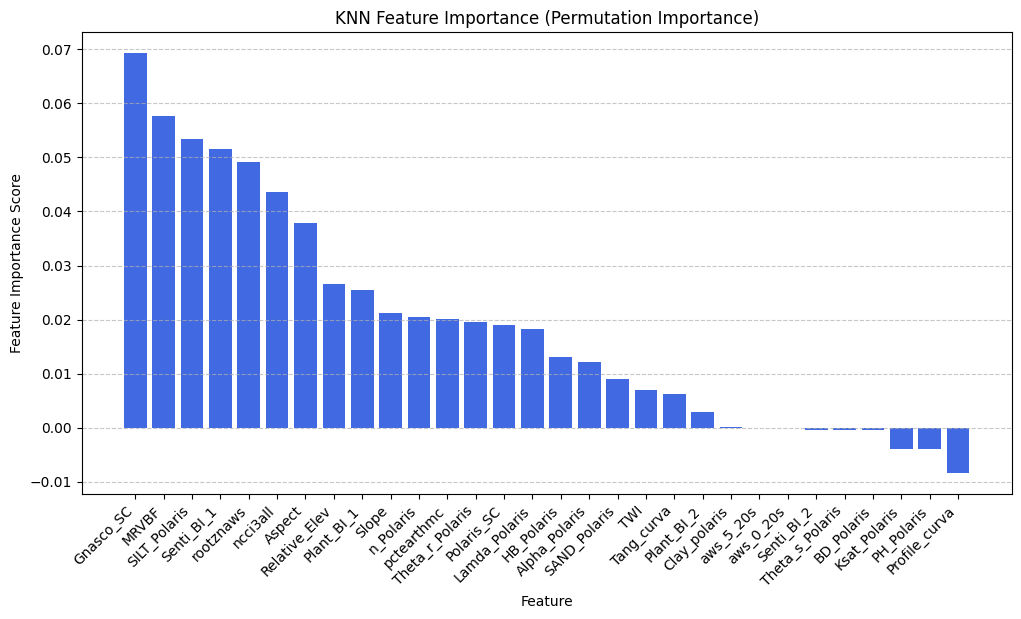

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

 # Now, remove rows with NaN values from both X and y:
#df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist()) # Make sure all columns in X are included.
#X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
knn = KNeighborsRegressor(n_neighbors=10)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []


# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: KNeighborsRegressor")
print(f"Setup: {knn.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_knn = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})


# Compute feature importance using permutation importance
perm_importance = permutation_importance(knn, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)

# Extract importance scores
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot feature importance with scores on the y-axis
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.title('KNN Feature Importance (Permutation Importance)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

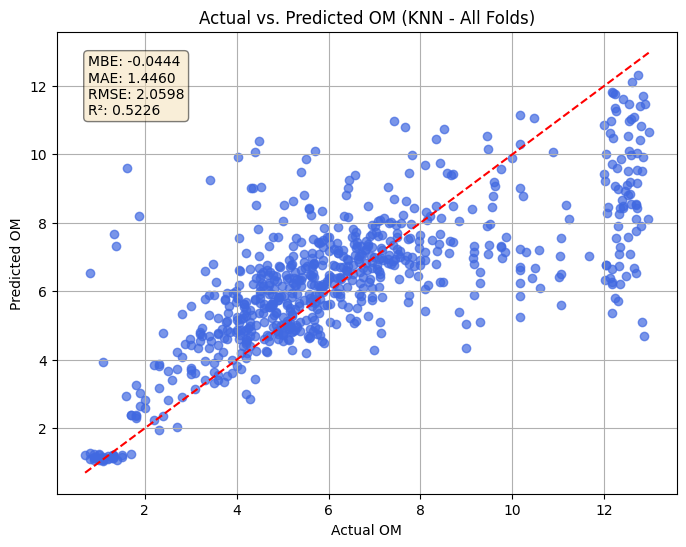

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (KNN - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

RFE kNN

Selected Top 90% Features (19 out of 30):
['Gnasco_SC', 'MRVBF', 'Relative_Elev', 'Aspect', 'Senti_BI_2', 'Profile_curva', 'Slope', 'Tang_curva', 'Plant_BI_1', 'ncci3all', 'Alpha_Polaris', 'PH_Polaris', 'HB_Polaris', 'Plant_BI_2', 'Theta_r_Polaris', 'Senti_BI_1', 'Ksat_Polaris', 'SILT_Polaris', 'Theta_s_Polaris']
Model: KNeighborsRegressor
Setup: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=-0.0418, MAE=1.4259, RMSE=2.0272, R²=0.5369


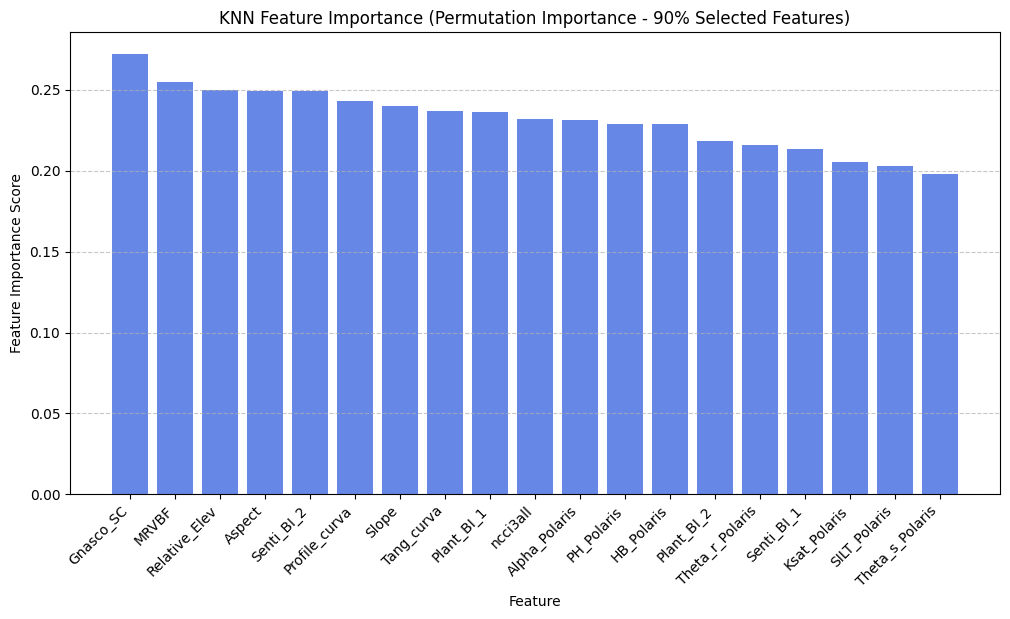

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Drop rows with NaN values in X and y
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())  # Make sure all columns in X are included.
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize baseline KNN model for feature importance evaluation
knn_baseline = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='minkowski')

# Train KNN model on all features
knn_baseline.fit(X_scaled, y)

# Compute feature importance using permutation importance
perm_importance = permutation_importance(knn_baseline, X_scaled, y, scoring='r2', n_repeats=10, random_state=42)

# Extract importance scores and feature names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort features by importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 90% most important features
num_features_to_select = int(0.65 * X.shape[1])
selected_features = feature_importance_df['Feature'].iloc[:num_features_to_select].tolist()
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features)

# Reduce X to selected features
X_selected = X[selected_features].values
X_selected_scaled = scaler.fit_transform(X_selected)  # Standardize selected features

# Initialize KNN model for final training and testing
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='minkowski')

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected_scaled):
    X_train, X_test = X_selected_scaled[train_index], X_selected_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: KNeighborsRegressor")
print(f"Setup: {knn.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_knn_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Plot feature importance with confidence intervals
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:num_features_to_select],
        feature_importance_df['Importance'][:num_features_to_select],
        color='royalblue', alpha=0.8)

plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.title('KNN Feature Importance (Permutation Importance - 90% Selected Features)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

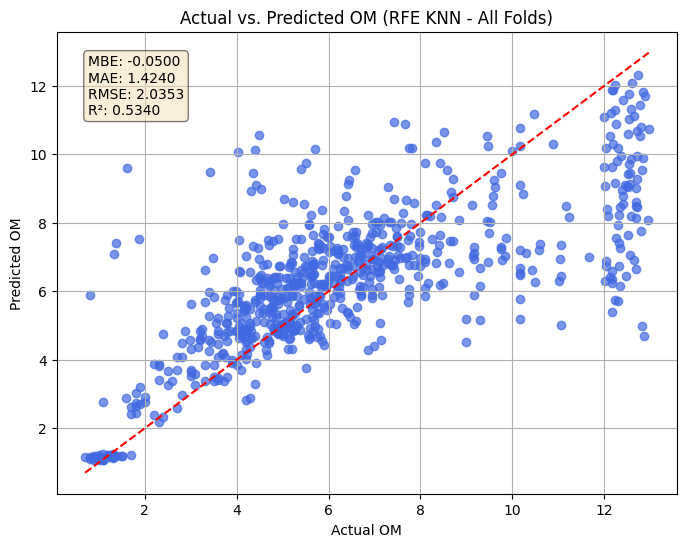

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (RFE KNN - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

KNN with cv and test

Selected Top 90% Features: ['Gnasco_SC', 'MRVBF', 'Aspect', 'Relative_Elev', 'Profile_curva', 'Senti_BI_2', 'HB_Polaris', 'Slope', 'Alpha_Polaris', 'PH_Polaris', 'ncci3all', 'Plant_BI_1', 'Tang_curva', 'Theta_r_Polaris', 'Plant_BI_2', 'SILT_Polaris', 'Ksat_Polaris', 'Senti_BI_1', 'BD_Polaris', 'Theta_s_Polaris', 'SAND_Polaris']

📊 Cross-Validation (Train set) Metrics:
MBE:  -0.0800
MAE:  1.4975
RMSE: 2.0914
R²:   0.4932

🧪 Test Set (Unseen) Metrics:
MBE:  -0.1116
MAE:  1.5392
RMSE: 2.1475
R²:   0.5511


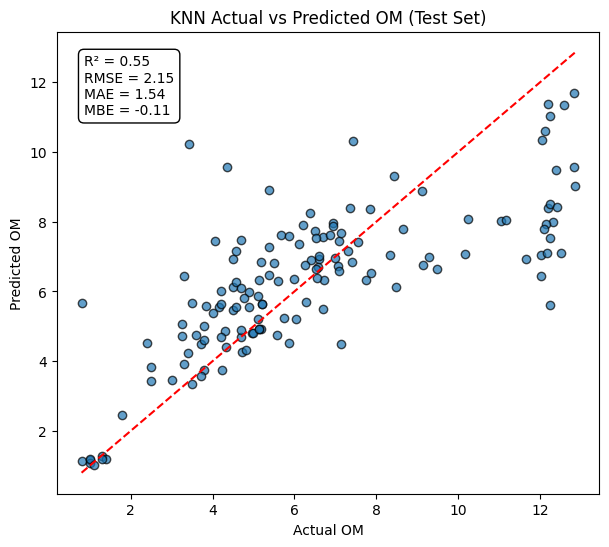

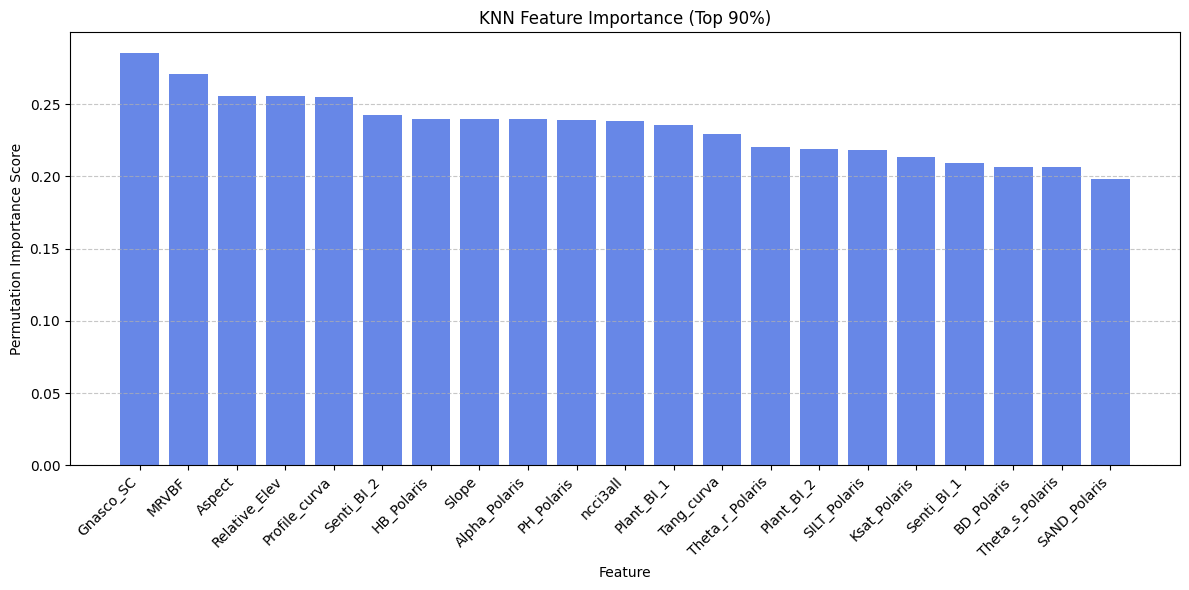

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs in X or y
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split: Train and Test
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ======== FEATURE SELECTION WITH PERMUTATION IMPORTANCE ON TRAIN SET ========= #
knn_baseline = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='minkowski')
knn_baseline.fit(X_train_full, y_train_full)
perm_importance = permutation_importance(knn_baseline, X_train_full, y_train_full, scoring='r2', n_repeats=10, random_state=42)

feature_importance = perm_importance.importances_mean
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 90% features
num_features_to_select = int(0.7 * X.shape[1])
selected_features = feature_importance_df['Feature'].iloc[:num_features_to_select].tolist()
print(f"Selected Top 90% Features: {selected_features}")

# Reduce to selected features
X_selected_full = df_cleaned[selected_features].values
X_selected_full_scaled = scaler.fit_transform(X_selected_full)

# Now split again using selected features
X_train, X_test = X_selected_full_scaled[:len(y_train_full)], X_selected_full_scaled[len(y_train_full):]
# Ensure y_train, y_test match dimensions
X_train, X_test, y_train, y_test = train_test_split(X_selected_full_scaled, y, test_size=0.2, random_state=42)

# ================== CROSS-VALIDATION ON TRAIN SET ================== #
kf = KFold(n_splits=10, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='minkowski')

mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_index, val_index in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_cv_train, y_cv_train)
    y_cv_pred = knn.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

print("\n📊 Cross-Validation (Train set) Metrics:")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# =============== FINAL EVALUATION ON TEST SET ==================== #
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 Test Set (Unseen) Metrics:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ============== ACTUAL vs PREDICTED SCATTER PLOT ================== #
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("KNN Actual vs Predicted OM (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}\nMBE = {test_mbe:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

# ============== FEATURE IMPORTANCE BAR PLOT ================= #
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:num_features_to_select],
        feature_importance_df['Importance'][:num_features_to_select],
        color='royalblue', alpha=0.8)




plt.ylabel('Permutation Importance Score')
plt.xlabel('Feature')
plt.title('KNN Feature Importance (Top 90%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KSVM

Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel
Setup: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Average Metrics Across 10-Fold CV:
MBE=-0.5222, MAE=1.5092, RMSE=2.2863, R²=0.4088


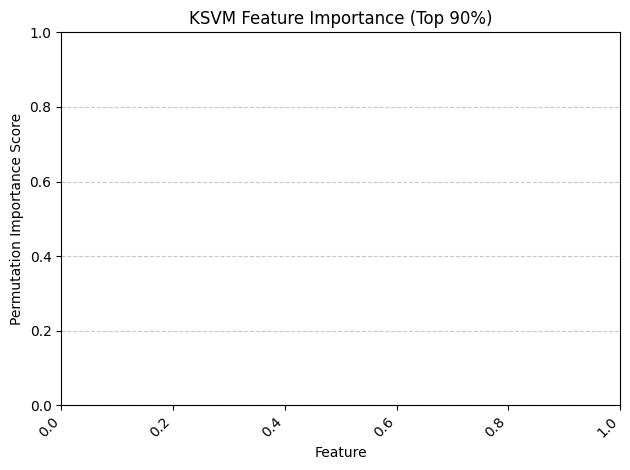

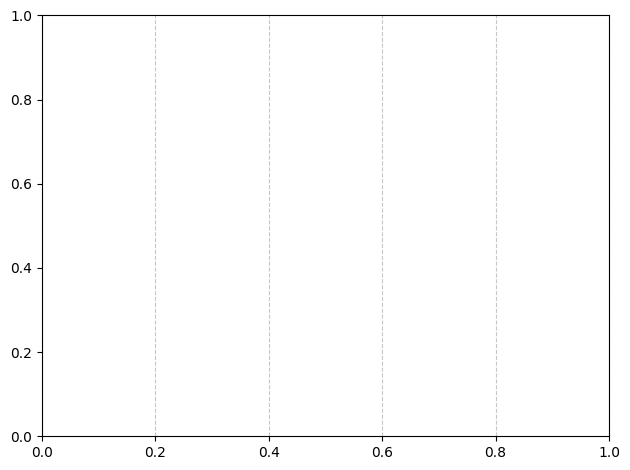

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Initialize Kernelized Support Vector Machines (KSVM) with RBF kernel
ksvm = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    ksvm.fit(X_train, y_train)

    # Predictions
    y_pred = ksvm.predict(X_test)

      # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel")
print(f"Setup: {ksvm.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ksvm = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Feature Importance for Linear Kernel Only
if ksvm.kernel == 'linear':  # Fixed the variable reference
    feature_importances = np.abs(ksvm.coef_).flatten()  # Absolute values of coefficients
    feature_names = X.columns  # Feature names

    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort descending

    # Plot Feature Importance
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
    plt.ylabel("Feature Importance Score (Absolute Coefficients)")
    plt.xlabel("Feature")
    plt.title("Feature Importance Plot (SVR with Linear Kernel)")
    plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plt.ylabel('Permutation Importance Score')
plt.xlabel('Feature')
plt.title('KSVM Feature Importance (Top 90%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Model: Kernelized SVM (RBF)
Average Metrics (10-Fold CV):
MBE=-0.5222, MAE=1.5092, RMSE=2.2863, R²=0.4088


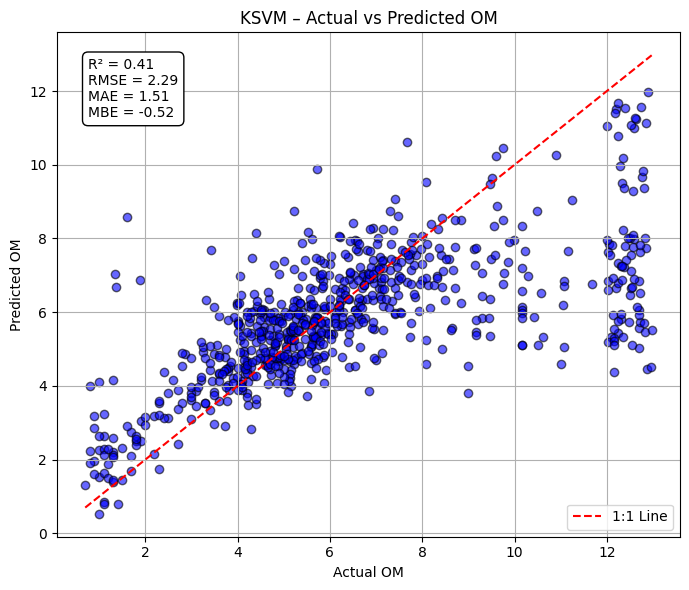


Estimating feature importance (permutation)...


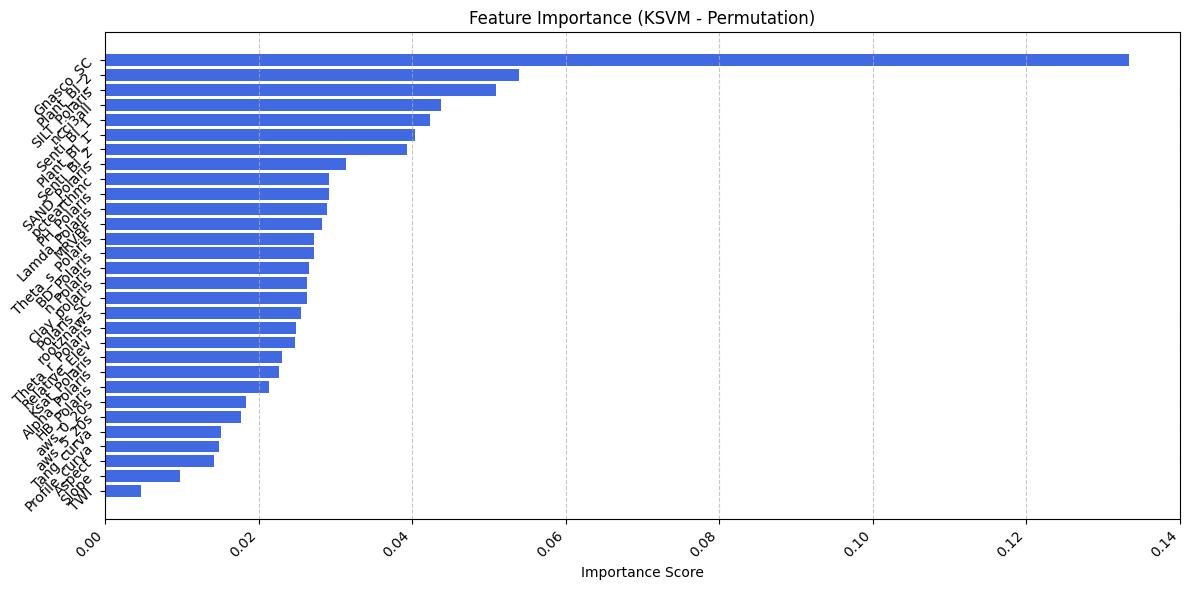

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

# Define features and target
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs
X = X.dropna()
y = y[X.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize SVR with RBF kernel
ksvm = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')

# 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []
all_y_test, all_y_pred = [], []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ksvm.fit(X_train, y_train)
    y_pred = ksvm.predict(X_test)

    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

    mbe = np.mean(y_pred - y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Print averaged metrics
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

print(f"Model: Kernelized SVM (RBF)")
print(f"Average Metrics (10-Fold CV):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create final DataFrame of predictions
df_ksvm = pd.DataFrame({
    'Actual OM': all_y_test,
    'Predicted OM': all_y_pred
})

# ---- SCATTER PLOT ----
plt.figure(figsize=(7, 6))
plt.scatter(df_ksvm['Actual OM'], df_ksvm['Predicted OM'], alpha=0.6, color='blue', edgecolors='k')
plt.plot([df_ksvm['Actual OM'].min(), df_ksvm['Actual OM'].max()],
         [df_ksvm['Actual OM'].min(), df_ksvm['Actual OM'].max()],
         'r--', label='1:1 Line')

plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("KSVM – Actual vs Predicted OM")

plt.text(0.05, 0.95,
         f"R² = {avg_r2:.2f}\nRMSE = {avg_rmse:.2f}\nMAE = {avg_mae:.2f}\nMBE = {avg_mbe:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- PERMUTATION FEATURE IMPORTANCE ----
print("\nEstimating feature importance (permutation)...")
ksvm.fit(X_scaled, y)  # Fit once on full data
perm_result = permutation_importance(ksvm, X_scaled, y, n_repeats=10, random_state=42, scoring='r2')

# Prepare feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation-based feature importance
plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (KSVM - Permutation)")
plt.xlabel("Importance Score")
plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


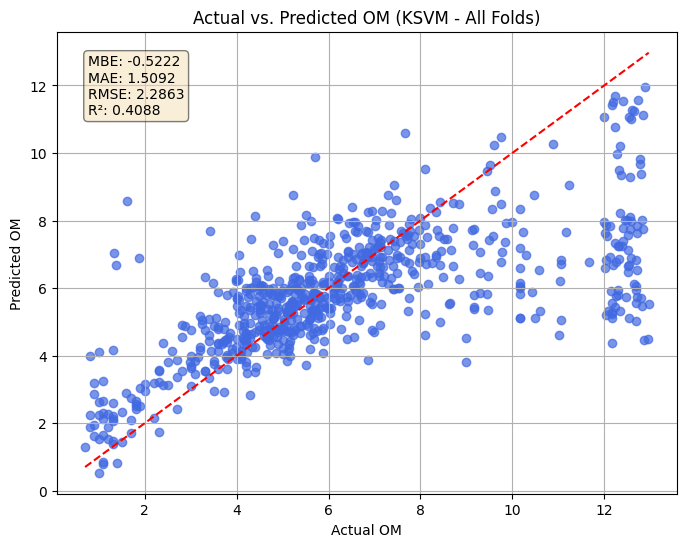

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (KSVM - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

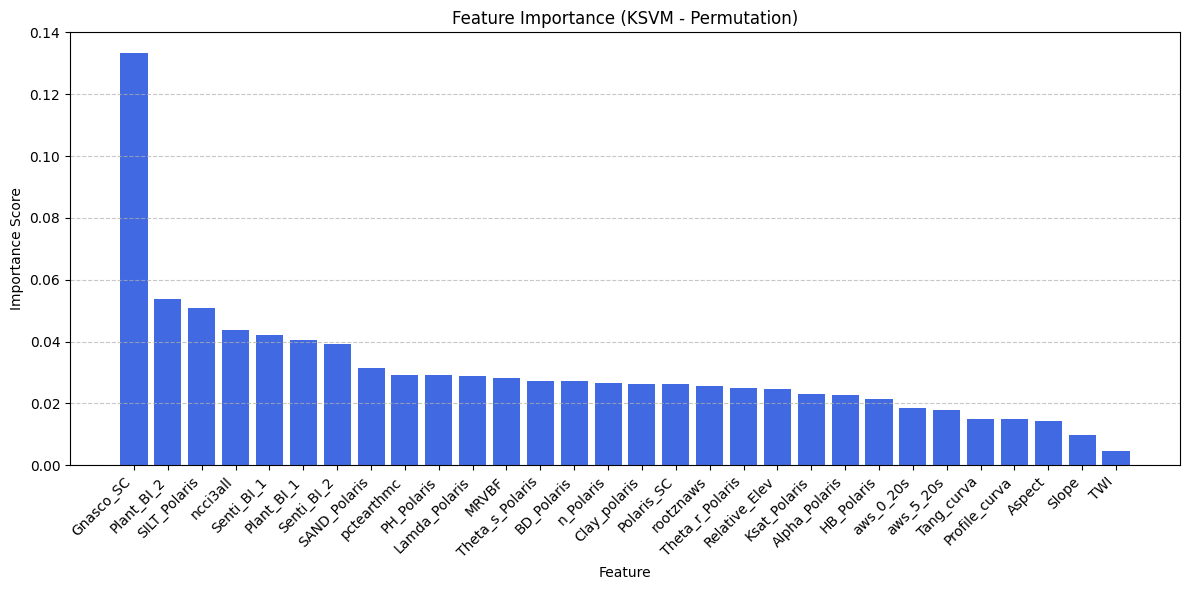

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.title("Feature Importance (KSVM - Permutation)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


RFE KSVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Kernelized Support Vector Machines (KSVM) with RBF kernel
ksvm = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.8 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=SVR(kernel='linear'), n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []


# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []


# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    ksvm.fit(X_train, y_train)

    # Predictions
    y_pred = ksvm.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel")
print(f"Setup: {ksvm.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ksvm_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Feature Importance for Linear Kernel Only
if ksvm.kernel == 'linear':  # If using a linear kernel, extract feature importance
    feature_importances = np.abs(ksvm.coef_).flatten()  # Absolute values of coefficients
    feature_names = selected_features  # Only selected features

    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort descending

    # Plot Feature Importance
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
    plt.ylabel("Feature Importance Score (Absolute Coefficients)")
    plt.xlabel("Feature")
    plt.title("Feature Importance Plot (SVR with Linear Kernel)")
    plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Selected Top 90% Features (24 out of 31):
['Sensor_OM', 'Relative_Elev', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'Clay_polaris', 'BD_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris', 'Theta_s_Polaris']
Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel
Setup: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=-0.3471, MAE=1.3715, RMSE=1.9567, R²=0.4067



Estimating feature importance using permutation (KSVM with RBF kernel, 90% selected features)...


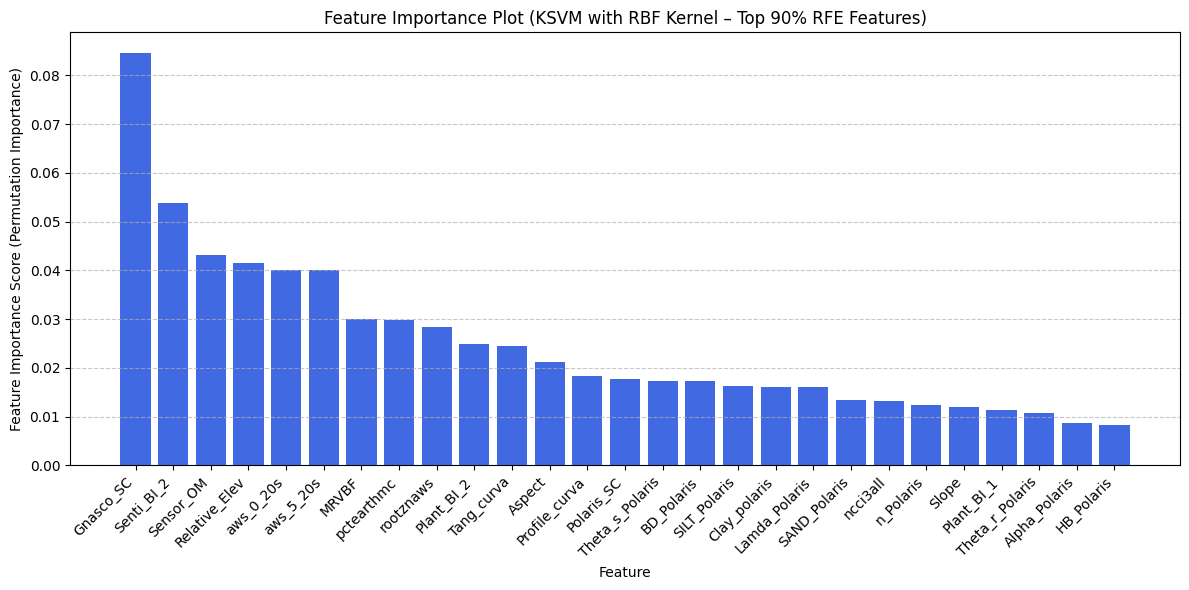

In [ ]:
from sklearn.inspection import permutation_importance

# ---- Permutation Feature Importance for KSVM with RBF Kernel (Top 90% RFE-selected) ----
print("\nEstimating feature importance using permutation (KSVM with RBF kernel, 90% selected features)...")

# Fit on full data with selected features
ksvm.fit(X_selected, y)

# Get permutation importance
perm_result = permutation_importance(
    ksvm, X_selected, y, n_repeats=10, random_state=42, scoring='r2'
)

# Build DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score (Permutation Importance)")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (KSVM with RBF Kernel – Top 90% RFE Features)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


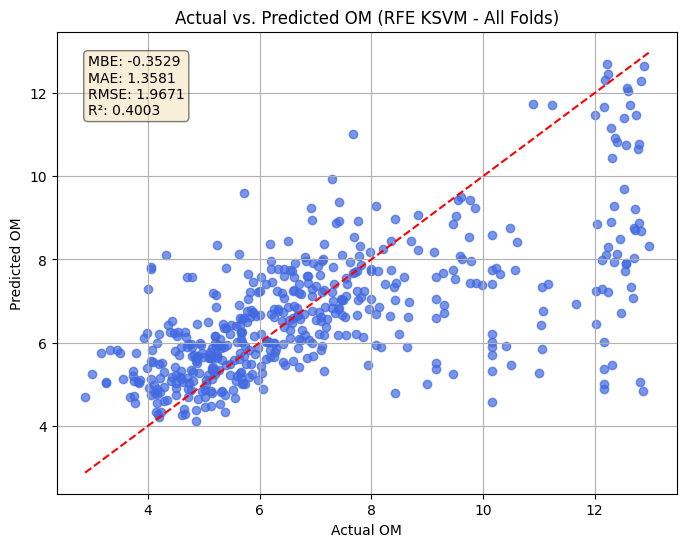

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (RFE KSVM - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

PLSE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define X and y
X = df_m.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize PLSR with a fixed number of components (tunable)
n_components = min(10, X_train.shape[1])  # Safe upper limit
plsr = PLSRegression(n_components=n_components)

# 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    plsr.fit(X_cv_train, y_cv_train)
    y_cv_pred = plsr.predict(X_cv_val).ravel()

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

# Average CV metrics
print("\n📊 PLSR – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# Final training on full training set



📊 PLSR – 10-Fold Cross-Validation (Train Set):
MBE:  0.0022
MAE:  1.6669
RMSE: 2.2521
R²:   0.4115


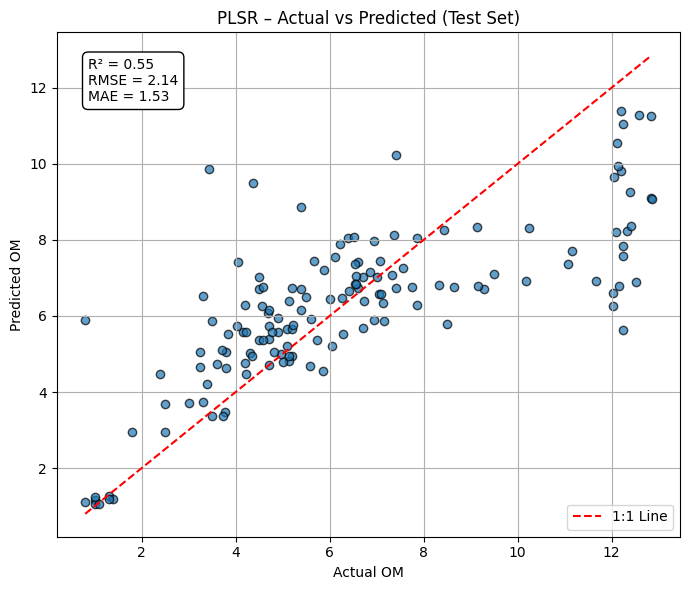

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("PLSR – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


GB

Model: Gradient Boosting Regressor
Setup: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV:
MBE=0.0114, MAE=1.3693, RMSE=1.9881, R²=0.5527


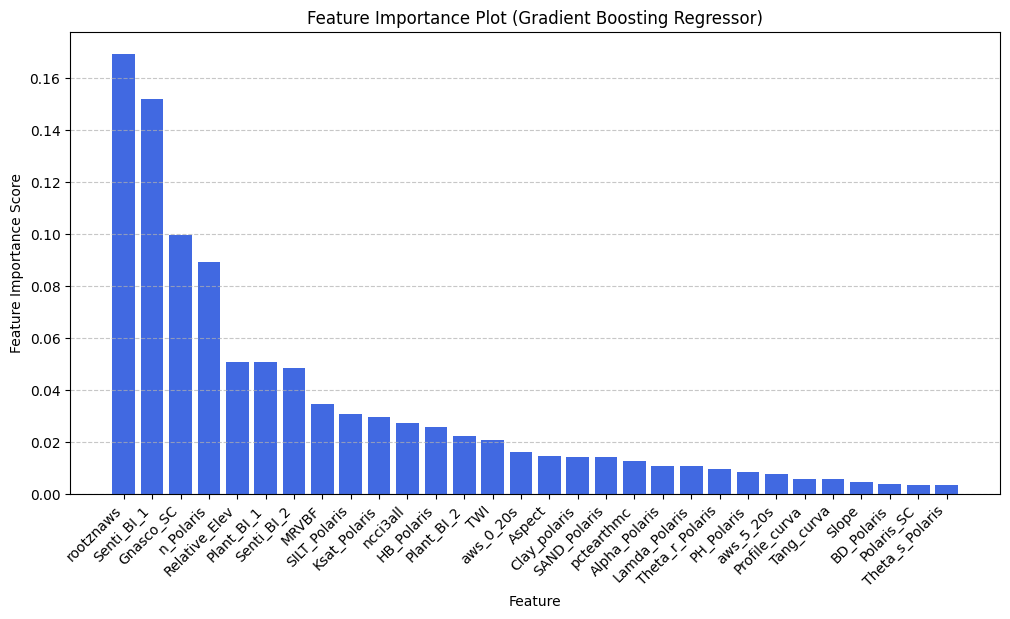

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    gbr.fit(X_train, y_train)

    # Predictions
    y_pred = gbr.predict(X_test)

    # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Gradient Boosting Regressor")
print(f"Setup: {gbr.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_gb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = gbr.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Gradient Boosting Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


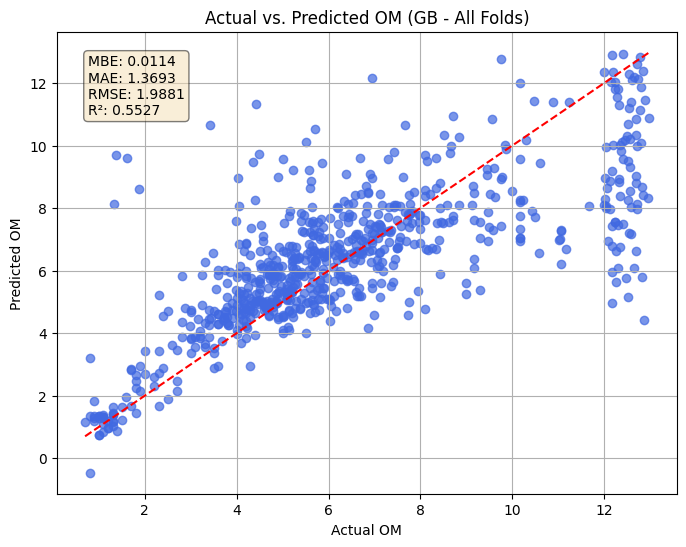

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (GB - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

RFE GB

Selected Top 80% Features (22 out of 30):
['Relative_Elev', 'Aspect', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_s_Polaris']
Model: Gradient Boosting Regressor
Setup: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV (with 80% selected features):
MBE=0.0201, MAE=1.3455, RMSE=1.9581, R²=0.5673


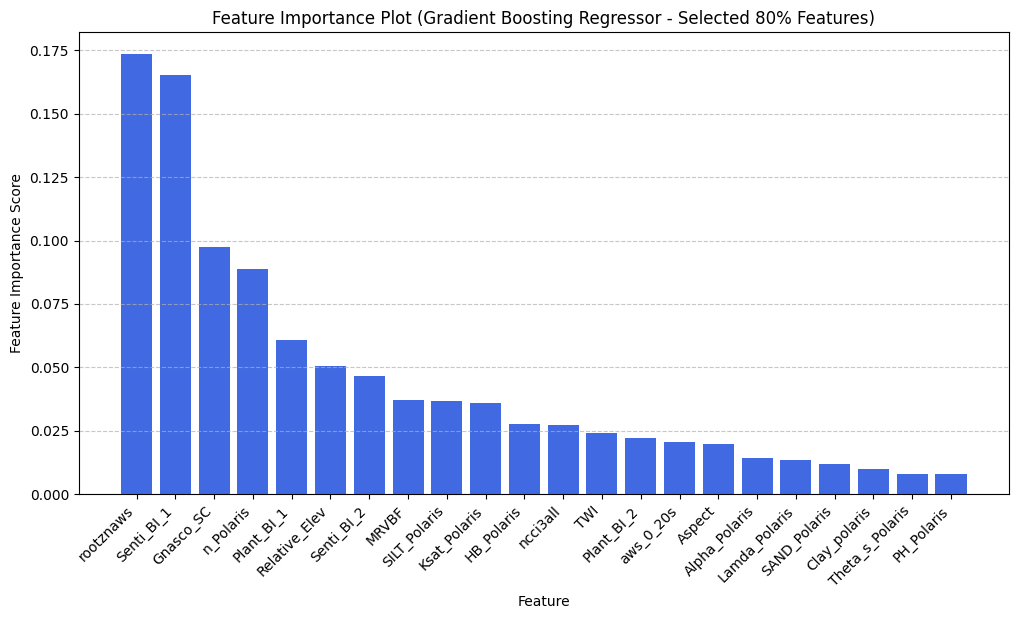

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in




# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Set the number of features to select (80% of total features)
num_features_to_select = int(0.75 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=gbr, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 80% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    gbr.fit(X_train, y_train)

    # Predictions
    y_pred = gbr.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Gradient Boosting Regressor")
print(f"Setup: {gbr.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 80% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_gb_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = gbr.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Gradient Boosting Regressor - Selected 80% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

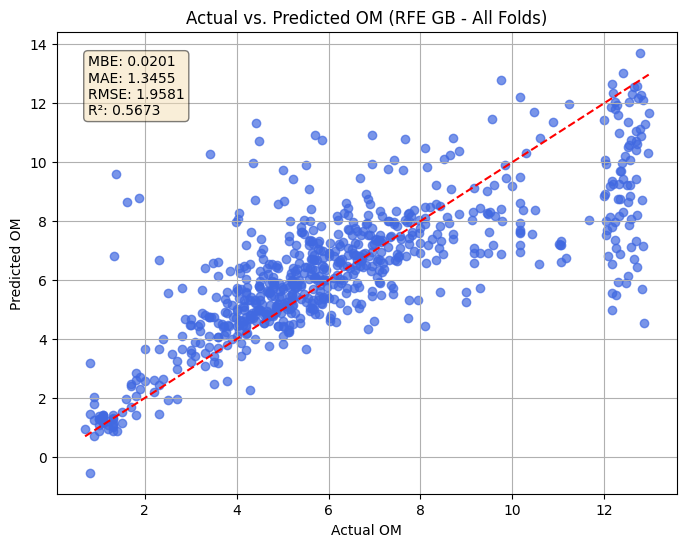

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (RFE GB - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

RFE GB CV-test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs in X or y
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into Train/Test (80/20)
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize GBR
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# RFE on training set only (select top 90% features)
num_features_to_select = int(0.8 * X.shape[1])
rfe = RFE(estimator=gbr, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce both train and test to selected features
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# ---------- 10-Fold CV on Train Set ----------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    gbr.fit(X_cv_train, y_cv_train)
    y_cv_pred = gbr.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

print("\n📊 Gradient Boosting – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# ---------- Final Model Training and Test Evaluation ----------
gbr.fit(X_train, y_train)
y_pred_test = gbr.predict(X_test)

test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 Final Evaluation on Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ---------- Plot: Actual vs Predicted ----------
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Gradient Boosting – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot: Feature Importance ----------
feature_importances = gbr.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Gradient Boosting - Selected 90%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'df_m' is not defined

DT

Model: Decision Tree Regressor
Setup: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Average Metrics Across 10-Fold CV:
MBE=0.0132, MAE=1.6990, RMSE=2.6358, R²=0.2210


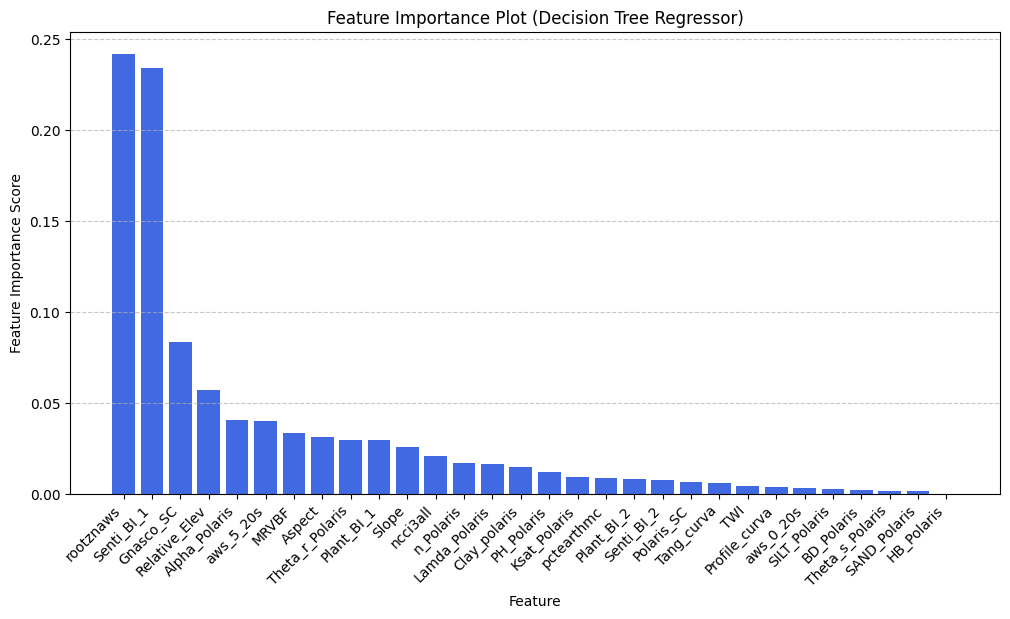

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=10)  # Adjust max_depth for better performance

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Decision Tree Regressor")
print(f"Setup: {dt.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dt = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = dt.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Decision Tree Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

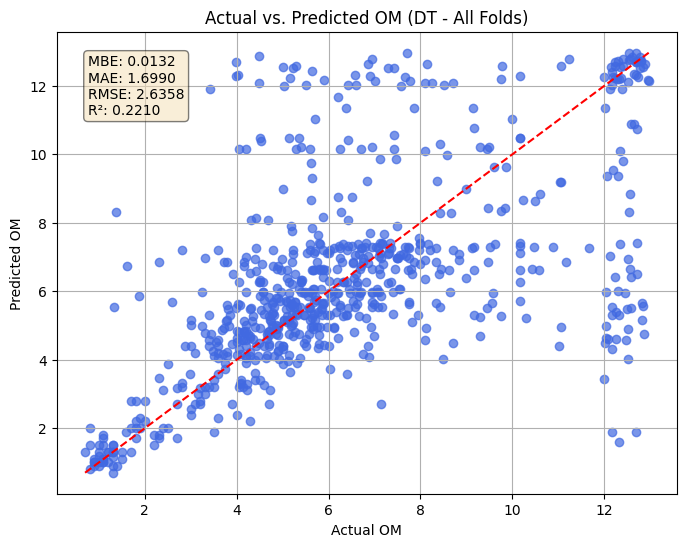

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_y_test, all_y_pred, color="royalblue", alpha=0.7)  # Scatter plot of all predictions
plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs. Predicted OM (DT - All Folds)")
plt.grid(True)



# Add metrics text to the plot
textstr = '\n'.join((
    f'MBE: {avg_mbe:.4f}',
    f'MAE: {avg_mae:.4f}',
    f'RMSE: {avg_rmse:.4f}',
    f'R²: {avg_r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

With RFE DT

Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'Theta_r_Polaris']
Model: Decision Tree Regressor
Setup: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.0194, MAE=1.6654, RMSE=2.6086, R²=0.2333


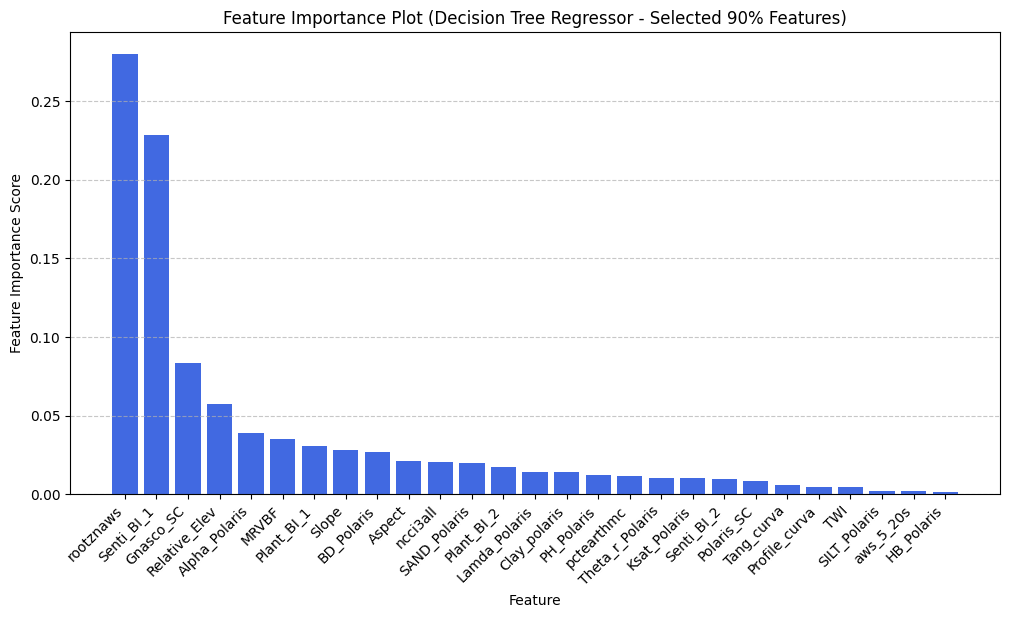

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=10)  # Adjust max_depth for better performance

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=dt, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Decision Tree Regressor")
print(f"Setup: {dt.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dt_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = dt.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Decision Tree Regressor - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RFE DT_CV_Test


✅ Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_s_Polaris']

📊 Decision Tree – 10-Fold Cross-Validation (Train Set):
MBE:  -0.0124
MAE:  1.7407
RMSE: 2.6758
R²:   0.1628

🧪 Final Evaluation on Unseen Test Set:
MBE:  -0.2090
MAE:  1.7123
RMSE: 2.5208
R²:   0.3814


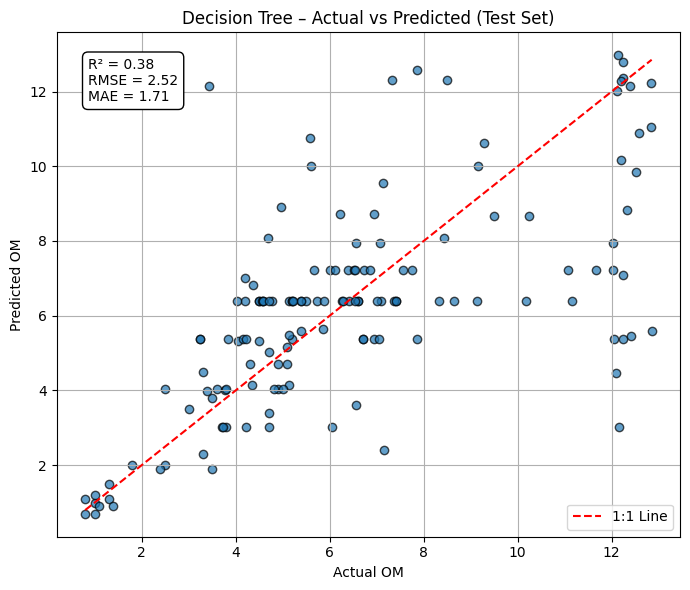

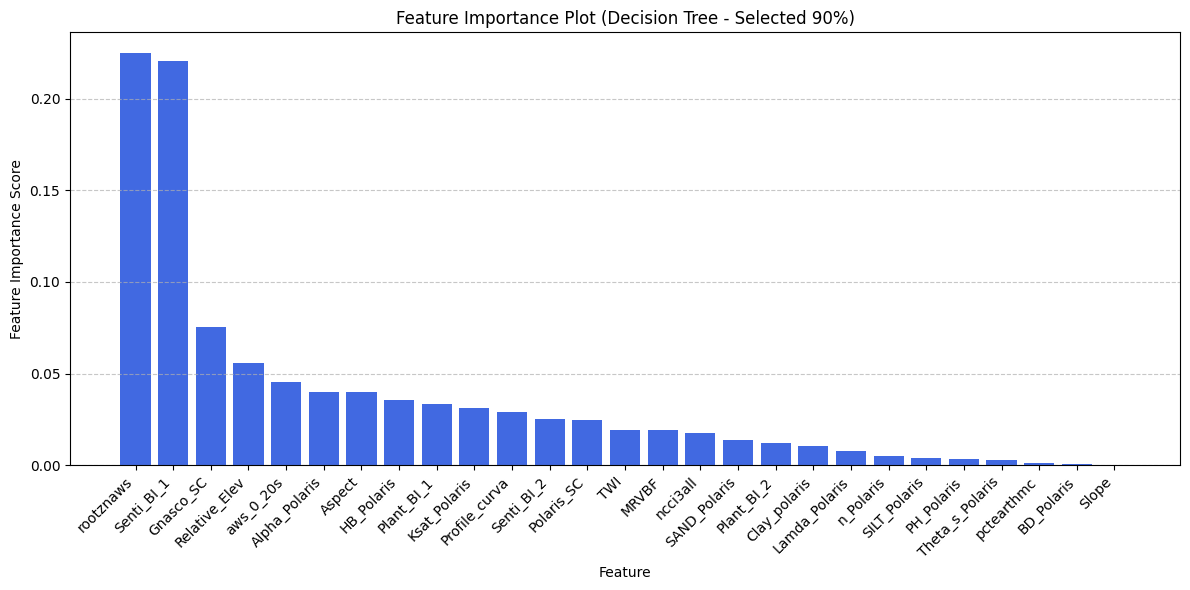

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=10)

# Perform RFE on training set only
num_features_to_select = int(0.9 * X.shape[1])
rfe = RFE(estimator=dt, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce both train and test sets
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# ---- 10-Fold Cross-Validation on Train Set ----
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    dt.fit(X_cv_train, y_cv_train)
    y_cv_pred = dt.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

print("\n📊 Decision Tree – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# ---- Final Model Training and Evaluation on Test Set ----
dt.fit(X_train, y_train)
y_pred_test = dt.predict(X_test)

test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ---- Actual vs Predicted Scatter Plot ----
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Decision Tree – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Feature Importance Plot ----
feature_importances = dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Decision Tree - Selected 90%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


XGBOOST

Model: XGBRegressor
Setup: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Average Metrics Across 10-Fold CV:
MBE=-0.0326, MAE=1.6300, RMSE=2.1804, R²=0

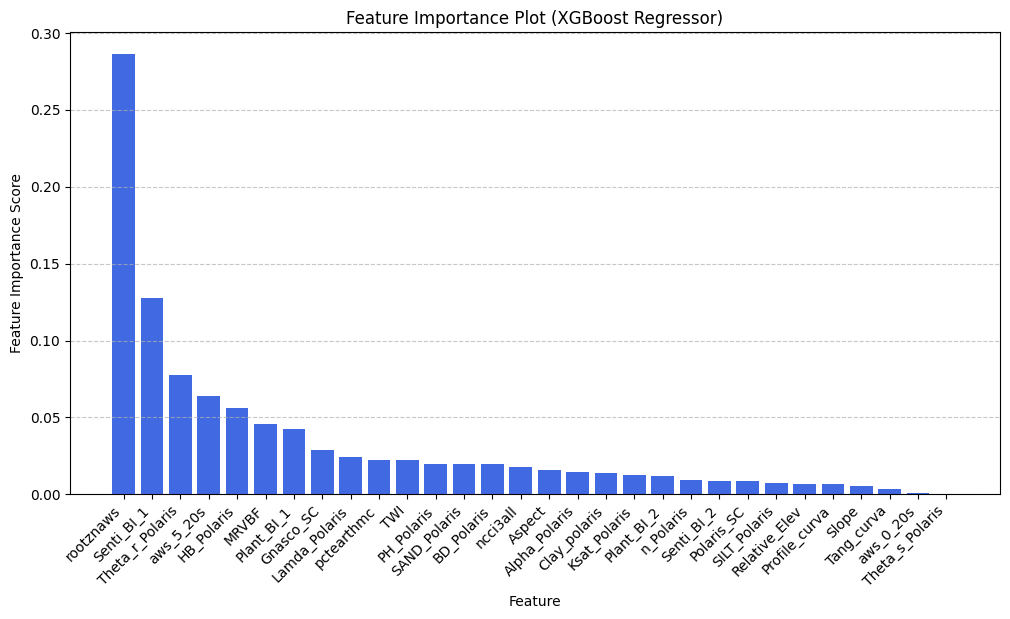

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42, max_depth=10, n_estimators=100, learning_rate=0.01)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    xgb.fit(X_train, y_train)

    # Predictions
    y_pred = xgb.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: XGBRegressor")
print(f"Setup: {xgb.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_xgb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = xgb.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (XGBoost Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

WITH RFE XGBOOST

Selected Top 90% Features (24 out of 30):
['Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris']
Model: XGBRegressor
Setup: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_cons

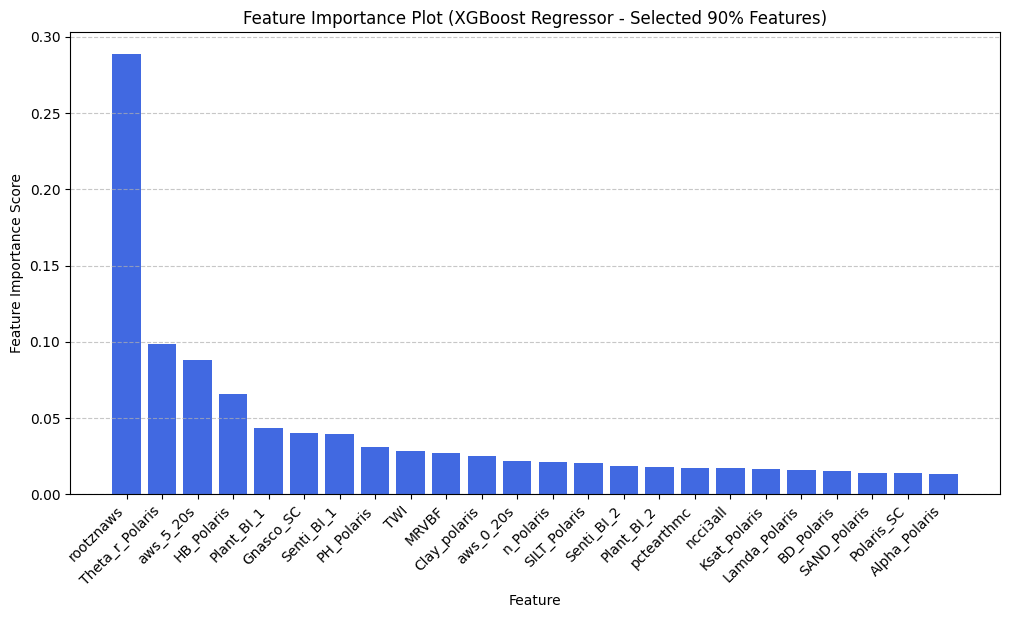

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long','Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42, max_depth=10, n_estimators=100, learning_rate=0.01)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.8 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=xgb, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    xgb.fit(X_train, y_train)

    # Predictions
    y_pred = xgb.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: XGBRegressor")
print(f"Setup: {xgb.get_params()}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_xgb_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances for the selected features
feature_importances = xgb.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (XGBoost Regressor - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RFE XGBOOST_CV_TEST


✅ Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris', 'Theta_s_Polaris']

📊 XGBoost – 10-Fold Cross-Validation (Train Set):
MBE:  -0.0117
MAE:  1.6801
RMSE: 2.2510
R²:   0.4131

🧪 Final Evaluation on Unseen Test Set:
MBE:  -0.1390
MAE:  1.7569
RMSE: 2.3282
R²:   0.4724


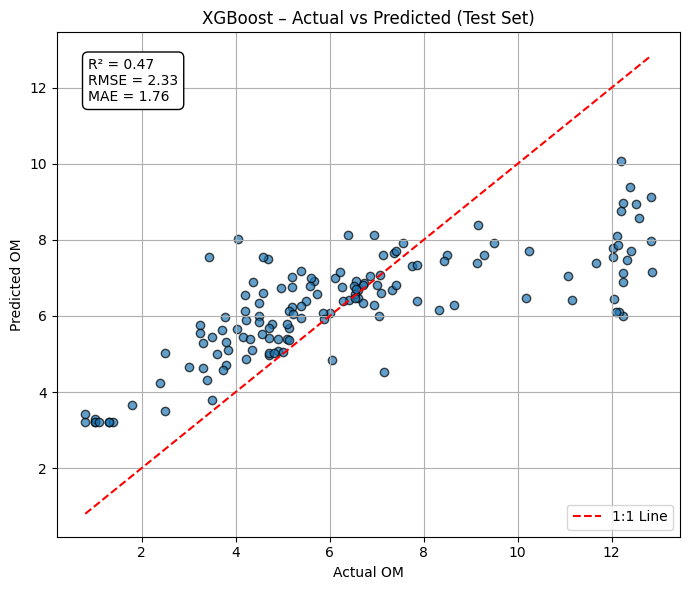

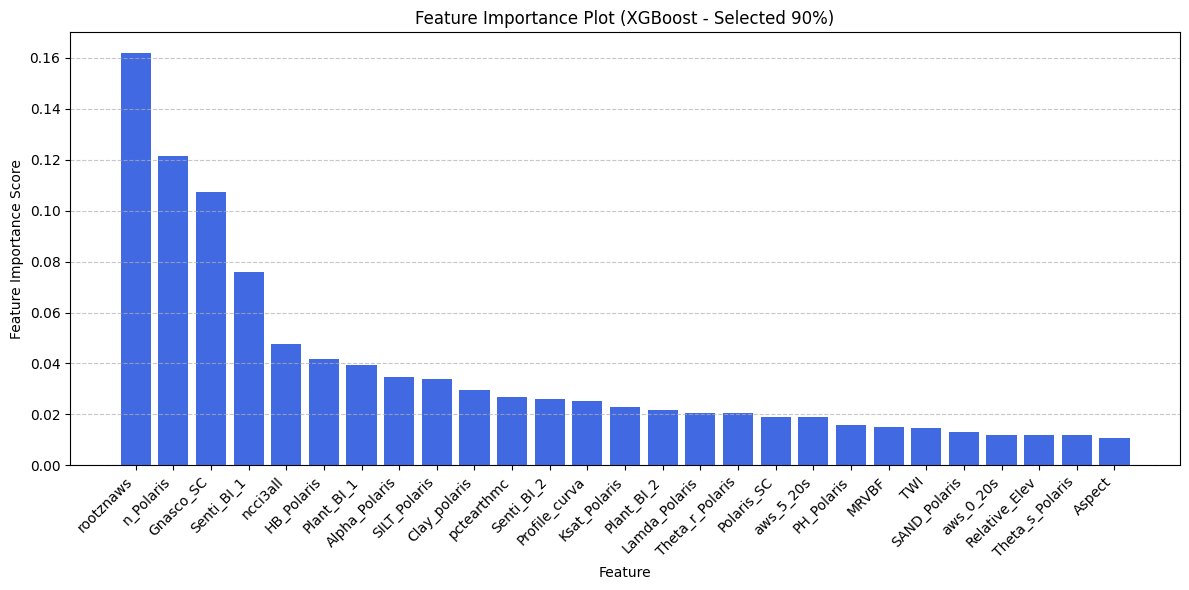

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess data
X = df_m.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM','SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_cleaned['OM']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into Train/Test
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize XGBoost
xgb = XGBRegressor(random_state=42, max_depth=10, n_estimators=100, learning_rate=0.01)

# Perform RFE on training set only
num_features_to_select = int(0.9 * X.shape[1])
rfe = RFE(estimator=xgb, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce features for both train and test sets
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# ========== Cross-Validation on Training Set ==========
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    xgb.fit(X_cv_train, y_cv_train)
    y_cv_pred = xgb.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

print("\n📊 XGBoost – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# ========== Final Model Training and Evaluation on Test Set ==========
xgb.fit(X_train, y_train)
y_pred_test = xgb.predict(X_test)

test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ========== Actual vs Predicted Scatter Plot ==========
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("XGBoost – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Feature Importance Plot ==========
feature_importances = xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (XGBoost - Selected 90%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


LIGHT GBM

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

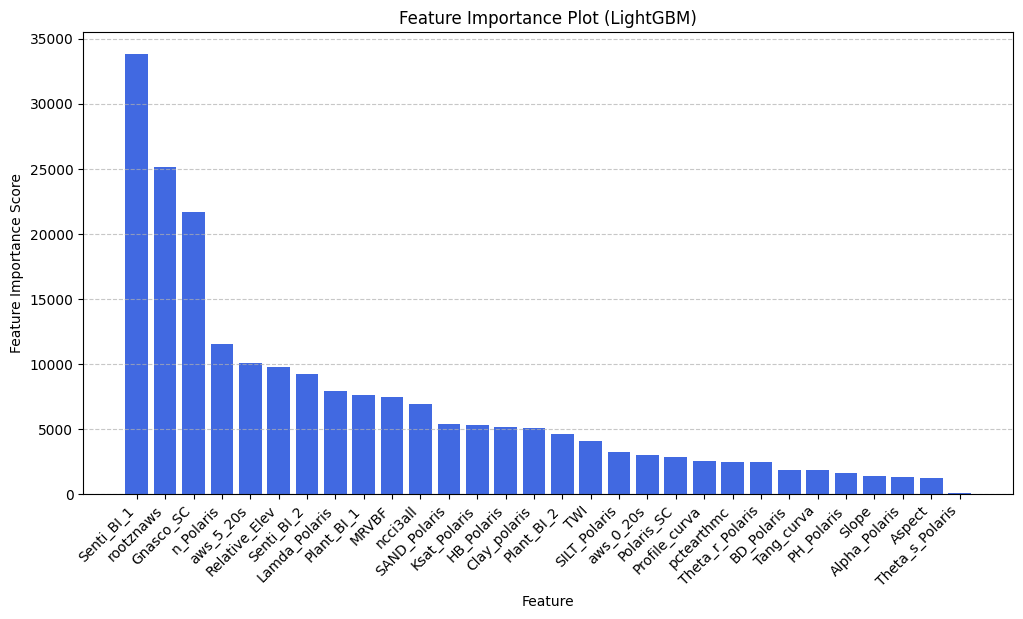

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features (optional for LightGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define LightGBM parameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Number of leaves in a tree
    'learning_rate': 0.01,  # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to use for each tree
    'bagging_fraction': 0.8,  # Fraction of data to use for each tree
    'bagging_freq': 5,  # Frequency for bagging
    'verbose': 0,  # Suppress output
    'random_state': 42,  # Random seed for reproducibility
}

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert data into LightGBM Dataset format
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Perform LightGBM cross-validation to determine optimal boosting rounds
    cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=1000,
        nfold=5,  # Inner 5-fold CV
        stratified=False,
        metrics='rmse',
        seed=42,
        return_cvbooster=True,
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Extract the best number of boosting rounds
    best_num_boost_rounds = len(cv_results['valid rmse-mean'])

    # Train final model on the fold
    model = lgb.train(
        params,
        train_data,
        num_boost_round=best_num_boost_rounds,
        valid_sets=[test_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Predict on test set
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: LightGBM")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_lgb = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_pred
})

# Extract feature importances
feature_importances = model.feature_importance(importance_type='gain')
feature_names = X.columns

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Light GB_TRAIN_Test_CV

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

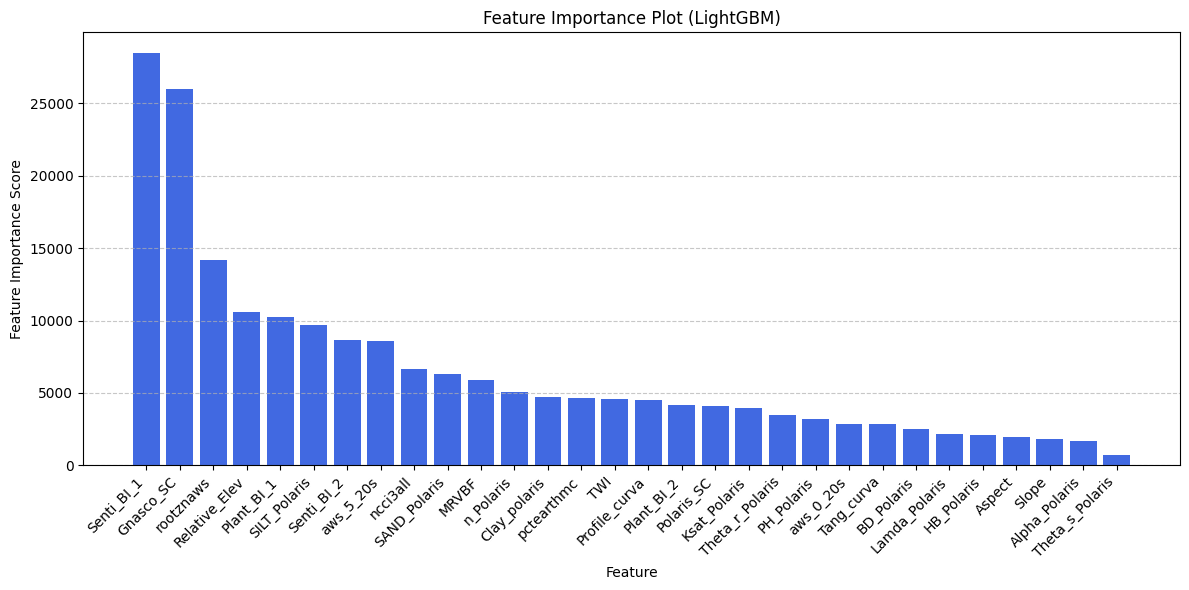

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with X

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42,
}

# 10-fold CV on training set
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    lgb_train = lgb.Dataset(X_tr, label=y_tr)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

    cv_model = lgb.train(
        params,
        lgb_train,
        num_boost_round=1000,
        valid_sets=[lgb_val],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    y_val_pred = cv_model.predict(X_val, num_iteration=cv_model.best_iteration)
    mbe_list.append(np.mean(y_val_pred - y_val))
    mae_list.append(mean_absolute_error(y_val, y_val_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    r2_list.append(r2_score(y_val, y_val_pred))

# Average CV metrics
print("\nCross-Validation Metrics (Train Split Only):")
print(f"MBE={np.mean(mbe_list):.4f}, MAE={np.mean(mae_list):.4f}, RMSE={np.mean(rmse_list):.4f}, R²={np.mean(r2_list):.4f}")

# Retrain final model on full training data
final_train_data = lgb.Dataset(X_train, label=y_train)
final_model = lgb.train(
    params,
    final_train_data,
    num_boost_round=cv_model.best_iteration  # Use best iteration from CV
)

# Evaluate on unseen test data
y_pred_test = final_model.predict(X_test, num_iteration=final_model.best_iteration)
mbe_test = np.mean(y_pred_test - y_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("\nFinal Model Evaluation on Unseen Test Set:")
print(f"MBE={mbe_test:.4f}, MAE={mae_test:.4f}, RMSE={rmse_test:.4f}, R²={r2_test:.4f}")

# Predicted vs Actual Plot
df_test_result = pd.DataFrame({'Actual OM': y_test.values, 'Predicted OM': y_pred_test})

# Feature importance
feature_importances = final_model.feature_importance(importance_type='gain')
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

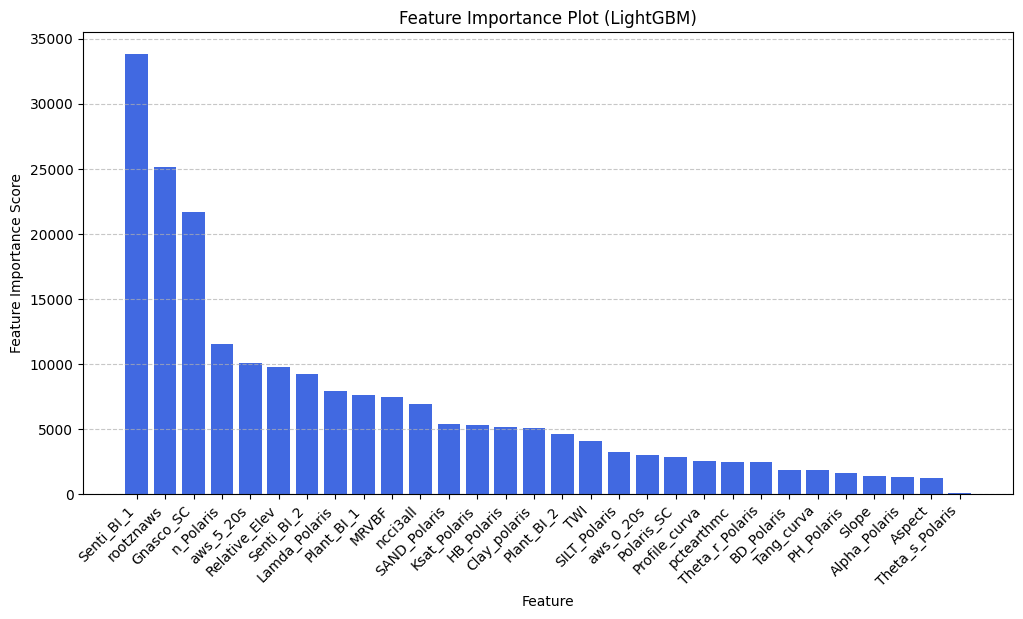

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features (optional for LightGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define LightGBM parameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Number of leaves in a tree
    'learning_rate': 0.01,  # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to use for each tree
    'bagging_fraction': 0.8,  # Fraction of data to use for each tree
    'bagging_freq': 5,  # Frequency for bagging
    'verbose': 0,  # Suppress output
    'random_state': 42,  # Random seed for reproducibility
}

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert data into LightGBM Dataset format
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Perform LightGBM cross-validation to determine optimal boosting rounds
    cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=1000,
        nfold=5,  # Inner 5-fold CV
        stratified=False,
        metrics='rmse',
        seed=42,
        return_cvbooster=True,
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Extract the best number of boosting rounds
    best_num_boost_rounds = len(cv_results['valid rmse-mean'])

    # Train final model on the fold
    model = lgb.train(
        params,
        train_data,
        num_boost_round=best_num_boost_rounds,
        valid_sets=[test_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Predict on test set
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: LightGBM")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_lgb = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_pred
})

# Extract feature importances
feature_importances = model.feature_importance(importance_type='gain')
feature_names = X.columns

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RFE LIGHT GBM

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor

# Feature and target
X = df_m.drop(columns=['OM', 'SAMPLEDATE', 'Elevation', 'lati', 'long', 'Sensor_OM'])
y = df_m['OM']
X = X.dropna()
y = y[X.index]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LightGBM base model for RFE
base_estimator = LGBMRegressor(
    objective='regression',
    learning_rate=0.01,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    random_state=42
)

# RFE to select ~90% features
rfe = RFE(estimator=base_estimator, n_features_to_select=int(0.9 * X.shape[1]), step=1)
rfe = rfe.fit(X_scaled, y)
selected_features = X.columns[rfe.support_]
print(f"Selected Features via RFE ({len(selected_features)} features):")
print(selected_features.tolist())

# Reduce feature set
X_selected = X[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)

# LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

# K-Fold CV on training set
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    train_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_val, label=y_val)

    cv_model = lgb.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[val_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],

    )

    y_val_pred = cv_model.predict(X_val, num_iteration=cv_model.best_iteration)
    mbe_list.append(np.mean(y_val_pred - y_val))
    mae_list.append(mean_absolute_error(y_val, y_val_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    r2_list.append(r2_score(y_val, y_val_pred))

print("\nCross-Validation Metrics on Training Set (10-fold):")
print(f"Avg MBE:  {np.mean(mbe_list):.4f}")
print(f"Avg MAE:  {np.mean(mae_list):.4f}")
print(f"Avg RMSE: {np.mean(rmse_list):.4f}")
print(f"Avg R²:   {np.mean(r2_list):.4f}")

# Retrain on full training set
final_train_data = lgb.Dataset(X_train, label=y_train)
final_model = lgb.train(
    params,
    final_train_data,
    num_boost_round=cv_model.best_iteration
)

# Predict on unseen test set
y_test_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration)
print("\nFinal Model Performance on Test Set:")
print(f"MBE:  {np.mean(y_test_pred - y_test):.4f}")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"R²:   {r2_score(y_test, y_test_pred):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Selected Features via RFE (27 features):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Tang_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'n_Polaris', 'Theta_r_Polaris']
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[255]	valid_0's rmse: 2.28541
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 1.58483
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[355]	valid_0's rmse: 2.29766
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[235]	valid_0's rmse: 1.56236
Training until validation scores don't improve for 50 rounds
Early s

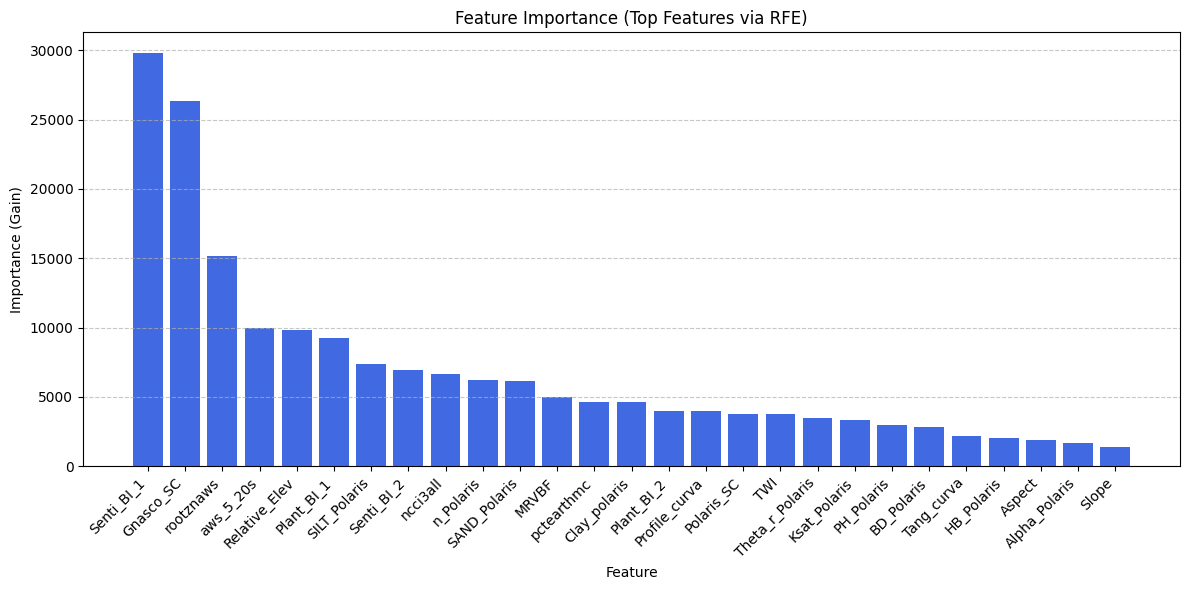

In [33]:
# Get feature importance from the final model
importances = final_model.feature_importance(importance_type='gain')
features = selected_features  # These are the RFE-selected feature names

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(feat_imp_df['Feature'], feat_imp_df['Importance'], color='royalblue')
plt.xlabel("Feature")
plt.ylabel("Importance (Gain)")
plt.title("Feature Importance (Top Features via RFE)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


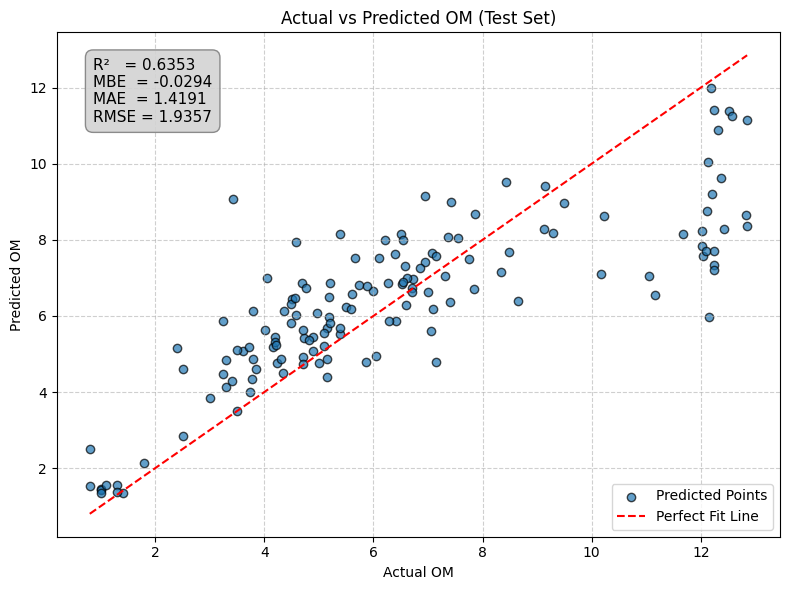

In [38]:
import matplotlib.pyplot as plt

# Calculate test metrics
mbe_test = np.mean(y_test_pred - y_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolor='k', label='Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit Line')

# Labels and grid
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Actual vs Predicted OM (Test Set)")
plt.grid(True, linestyle='--', alpha=0.6)

# Add metrics box
metrics_text = (
    f"R²   = {r2_test:.4f}\n"
    f"MBE  = {mbe_test:.4f}\n"
    f"MAE  = {mae_test:.4f}\n"
    f"RMSE = {rmse_test:.4f}"
)
props = dict(boxstyle='round,pad=0.5', facecolor='lightgray', edgecolor='gray', alpha=0.9)
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', bbox=props)

plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagg

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current valu

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

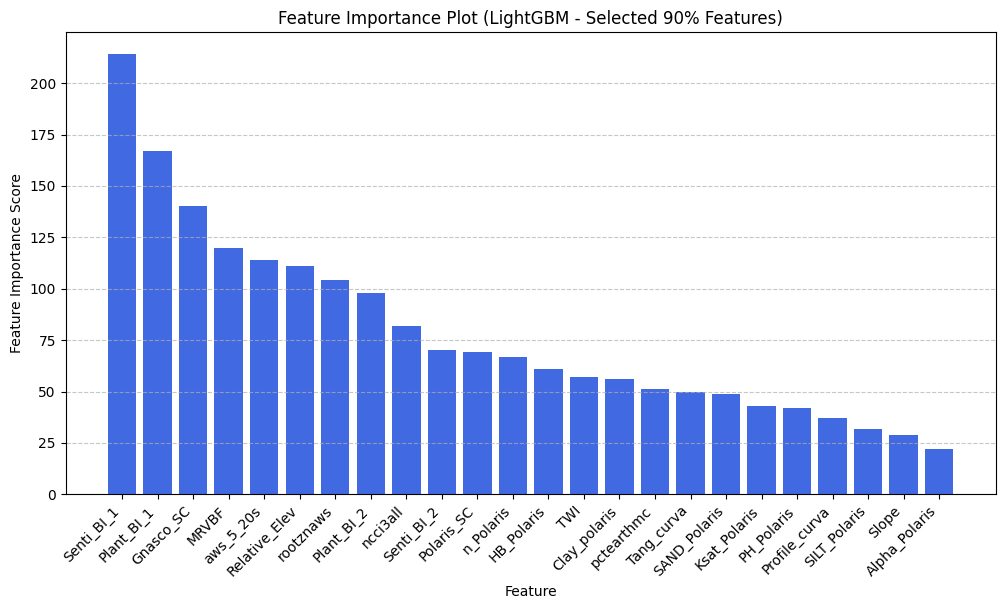

In [25]:
!pip install lightgbm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features (optional for LightGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.01,
    n_estimators=100,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42
)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.8 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=lgb_regressor, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train LightGBM model with early stopping
    lgb_regressor.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',  # Evaluation metric
        callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
    )

    # Predictions
    y_pred = lgb_regressor.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: LightGBM Regressor")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual OM from the last fold
df_lgb_rfe = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_pred
})

# Extract feature importances for the selected features
feature_importances = lgb_regressor.feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM - Selected 90% Features)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RFE _Light GBM_CV_Test

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🧪 LightGBM – Final Evaluation on Unseen Test Set:
MBE:  -0.0365
MAE:  1.7873
RMSE: 2.3160
R²:   0.4779


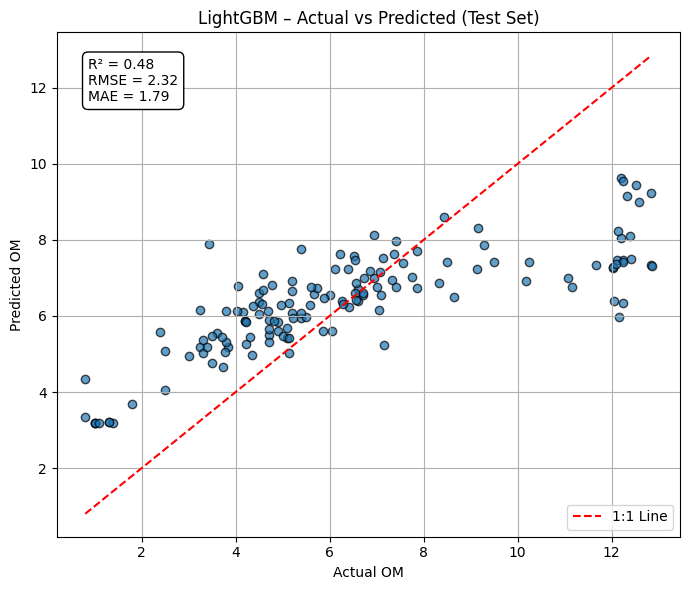

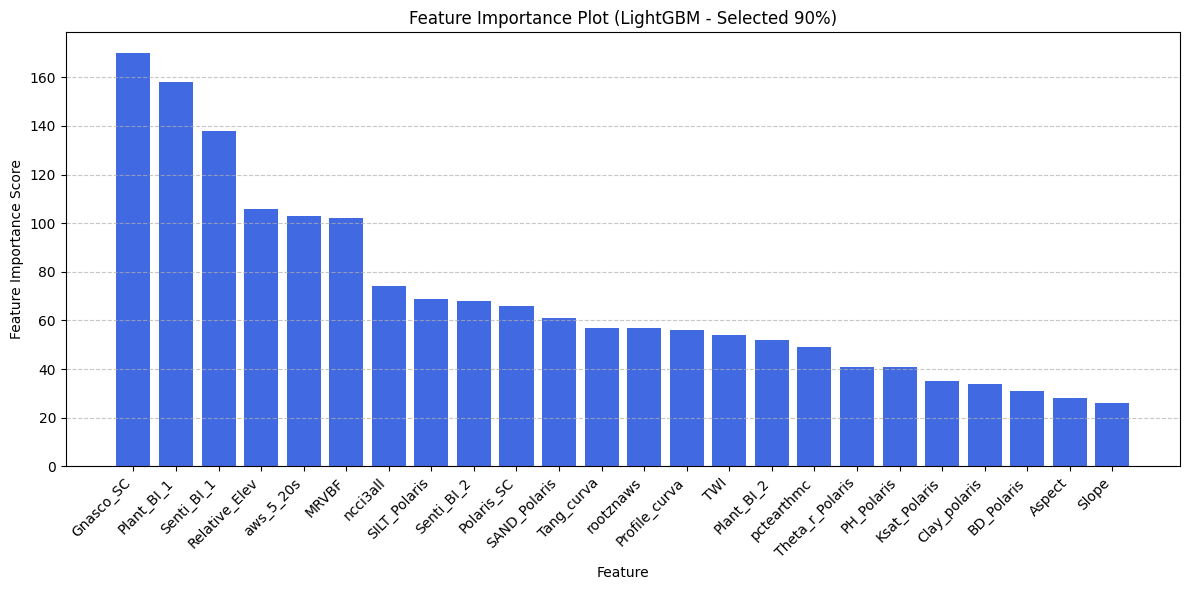

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent and dependent variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_cleaned['OM']

# Standardize features (optional for LGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize LightGBM
lgb_regressor = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.01,
    n_estimators=100,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42
)

# Apply RFE on training set only
num_features_to_select = int(0.8 * X.shape[1])
rfe = RFE(estimator=lgb_regressor, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce both train and test to selected features
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# ----------- 10-Fold Cross-Validation on Training Set -----------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model_cv = lgb.LGBMRegressor(**lgb_regressor.get_params())
    model_cv.fit(
        X_cv_train, y_cv_train,
        eval_set=[(X_cv_val, y_cv_val)],
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
    )

    y_cv_pred = model_cv.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

print("\n📊 LightGBM – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# ----------- Final Model on Full Training Set -----------
lgb_regressor.fit(X_train, y_train)
y_pred_test = lgb_regressor.predict(X_test)

test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 LightGBM – Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ----------- Actual vs Predicted Scatter Plot -----------
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("LightGBM – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- Feature Importance Plot -----------
feature_importances = lgb_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM - Selected 90%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Stackinig Regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM' ])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base Models for Stacking
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)  # Added GBR

# Define Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('gbr', gbr)  # Added GBR to the stacking model
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    cv=5
)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Stacking Model
    stacking_model.fit(X_train, y_train)

    # Predictions
    y_pred = stacking_model.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: StackingRegressor")
print(f"Setup: {stacking_model.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_sr = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Model: StackingRegressor
Setup: {'cv': 5, 'estimators': [('rf', RandomForestRegressor(max_depth=10, random_state=42)), ('knn', KNeighborsRegressor()), ('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)), ('lgbm', LGBMRegressor(max_depth=5, random_state=42)), ('gbr', GradientBoostingRegressor(max_depth=

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


WiTH RFE STACKING REGRESSOR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base model for feature selection
feature_selector_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=feature_selector_model, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Base Models for Stacking
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)

# Define Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('gbr', gbr)
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    cv=5
)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Stacking Model
    stacking_model.fit(X_train, y_train)

    # Predictions
    y_pred = stacking_model.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: StackingRegressor")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_sr_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Model: StackingRegressor
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=0.3163, MAE=1.7379, RMSE=2.3158, R²=0.3989


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CV_TESt RFE stacker


✅ Selected Top 90% Features (24 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4062
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 24
[LightGBM] [Info] Start training from score 6.369961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3230
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 24
[LightGBM] [Info] Start training from score 6.331691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4061
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 24
[LightGBM] [Info] Start training from score 6.361853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3233
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 24
[LightGBM] [Info] Start training from score 6.324976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4061
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 24
[LightGBM] [Info] Start training from score 6.260193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3238
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 24
[LightGBM] [Info] Start training from score 6.207222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4059
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 24
[LightGBM] [Info] Start training from score 6.440290
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3236
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 24
[LightGBM] [Info] Start training from score 6.397319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4056
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 24
[LightGBM] [Info] Start training from score 6.350907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3239
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 24
[LightGBM] [Info] Start training from score 6.280314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4058
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 24
[LightGBM] [Info] Start training from score 6.319807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 24
[LightGBM] [Info] Start training from score 6.249710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4067
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 24
[LightGBM] [Info] Start training from score 6.321329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3248
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 24
[LightGBM] [Info] Start training from score 6.256386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4073
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 24
[LightGBM] [Info] Start training from score 6.360250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3244
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 24
[LightGBM] [Info] Start training from score 6.303952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4068
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 24
[LightGBM] [Info] Start training from score 6.329037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3247
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 24
[LightGBM] [Info] Start training from score 6.320434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4068
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 24
[LightGBM] [Info] Start training from score 6.344239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 24
[LightGBM] [Info] Start training from score 6.233060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



📊 Stacking Regressor – 10-Fold CV (Train Set):
MBE:  -0.0186
MAE:  1.3697
RMSE: 1.9583
R²:   0.5546


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4526
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 24
[LightGBM] [Info] Start training from score 6.345781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3601
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 24
[LightGBM] [Info] Start training from score 6.283304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🧪 Final Evaluation on Unseen Test Set:
MBE:  -0.0092
MAE:  1.4150
RMSE: 2.0400
R²:   0.5949


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


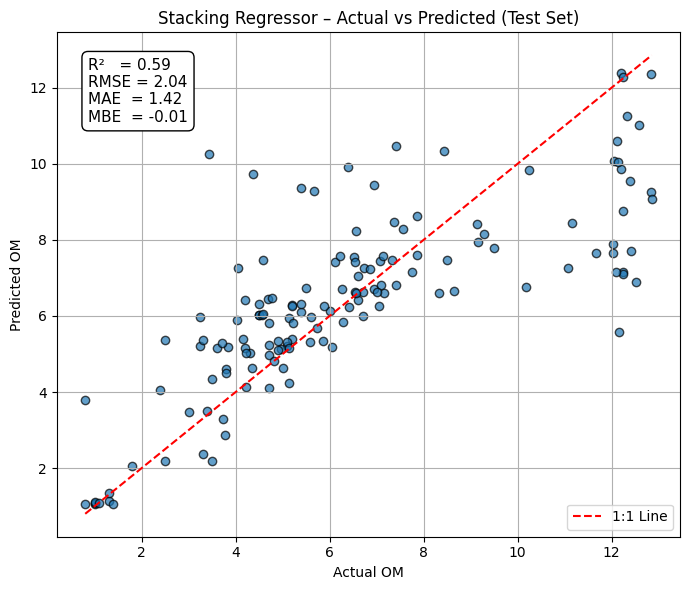

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load features and target
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_m['OM']

# Clean missing values
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train and Test sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Base model for feature selection
feature_selector_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Perform RFE on train set only
num_features_to_select = int(0.8 * X.shape[1])
rfe = RFE(estimator=feature_selector_model, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce to selected features
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# Define base models
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)

# Define Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('gbr', gbr)
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    cv=5
)

# Perform 10-fold CV on training set
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    stacking_model.fit(X_cv_train, y_cv_train)
    y_cv_pred = stacking_model.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

print("\n📊 Stacking Regressor – 10-Fold CV (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# Final model training on full train set and prediction on test set
stacking_model.fit(X_train, y_train)
y_pred_test = stacking_model.predict(X_test)

test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# Prediction plot
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Stacking Regressor – Actual vs Predicted (Test Set)")



plt.text(0.05, 0.95,
         f"R²   = {test_r2:.2f}\n"
         f"RMSE = {test_rmse:.2f}\n"
         f"MAE  = {test_mae:.2f}\n"
         f"MBE  = {test_mbe:.2f}",
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))


plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



✅ Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4580
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 27
[LightGBM] [Info] Start training from score 6.369961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3645
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.331691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4579
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 27
[LightGBM] [Info] Start training from score 6.361853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3646
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.324976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3666
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 27
[LightGBM] [Info] Start training from score 6.402386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4578
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 27
[LightGBM] [Info] Start training from score 6.260193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3652
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.207222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3657
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.227850
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4577
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 27
[LightGBM] [Info] Start training from score 6.440290
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3649
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.397319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3652
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.446473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4573
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 27
[LightGBM] [Info] Start training from score 6.350907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3654
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.280314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3654
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.397681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4576
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 27
[LightGBM] [Info] Start training from score 6.319807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3657
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.249710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3660
[LightGBM] [Info] Number of data points in the train set: 414, number of used features: 27
[LightGBM] [Info] Start training from score 6.319082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3666
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 27
[LightGBM] [Info] Start training from score 6.272000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4587
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 27
[LightGBM] [Info] Start training from score 6.321329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3662
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 27
[LightGBM] [Info] Start training from score 6.256386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4592
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 27
[LightGBM] [Info] Start training from score 6.360250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3660
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 27
[LightGBM] [Info] Start training from score 6.303952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4587
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 27
[LightGBM] [Info] Start training from score 6.329037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3664
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 27
[LightGBM] [Info] Start training from score 6.320434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4588
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 27
[LightGBM] [Info] Start training from score 6.344239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3655
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 27
[LightGBM] [Info] Start training from score 6.233060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


📊 Cross-Validation Results (10-Fold on 80% Train Set):
Average MBE:  -0.0193
Average MAE:  1.3946
Average RMSE: 1.9836
Average R²:   0.5421


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5103
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 27
[LightGBM] [Info] Start training from score 6.345781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4061
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 27
[LightGBM] [Info] Start training from score 6.283304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🧪 Final Evaluation on Unseen Test Set (20%):
MBE:  0.0032
MAE:  1.3961
RMSE: 1.9750
R²:   0.6203


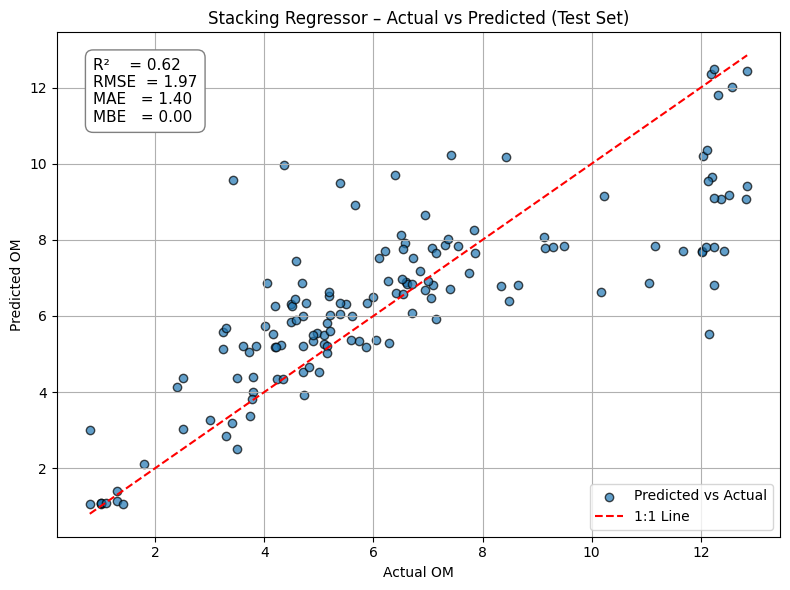

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and clean data
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_m['OM']
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_cleaned['OM']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# RFE with Random Forest
feature_selector_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
num_features_to_select = int(0.9 * X.shape[1])
rfe = RFE(estimator=feature_selector_model, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)
selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Subset to selected features
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# Define base models
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)

# Define stacking model
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('knn', knn), ('xgb', xgb), ('lgbm', lgbm), ('gbr', gbr)],
    final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    cv=5
)

# === 10-Fold Cross-Validation on Training Set ===
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    stacking_model.fit(X_cv_train, y_cv_train)
    y_cv_pred = stacking_model.predict(X_cv_val)

    mbe_list.append(np.mean(y_cv_pred - y_cv_val))
    mae_list.append(mean_absolute_error(y_cv_val, y_cv_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_cv_val, y_cv_pred)))
    r2_list.append(r2_score(y_cv_val, y_cv_pred))

# Print average CV metrics
cv_mbe = np.mean(mbe_list)
cv_mae = np.mean(mae_list)
cv_rmse = np.mean(rmse_list)
cv_r2 = np.mean(r2_list)

print("\n📊 Cross-Validation Results (10-Fold on 80% Train Set):")
print(f"Average MBE:  {cv_mbe:.4f}")
print(f"Average MAE:  {cv_mae:.4f}")
print(f"Average RMSE: {cv_rmse:.4f}")
print(f"Average R²:   {cv_r2:.4f}")

# === Final Training on Full Train Set and Test Evaluation ===
stacking_model.fit(X_train, y_train)
y_pred_test = stacking_model.predict(X_test)

# Compute test metrics
test_mbe = np.mean(y_pred_test - y_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("\n🧪 Final Evaluation on Unseen Test Set (20%):")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# === Prediction Plot with Metrics Box ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("Stacking Regressor – Actual vs Predicted (Test Set)")

# Annotate test metrics on plot
metrics_text = (
    f"R²    = {test_r2:.2f}\n"
    f"RMSE  = {test_rmse:.2f}\n"
    f"MAE   = {test_mae:.2f}\n"
    f"MBE   = {test_mbe:.2f}"
)
plt.text(0.05, 0.95, metrics_text,
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


DEEP NEURAL NETWORK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to build the DNN model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the DNN model
    dnn = build_dnn(X_train.shape[1])
    dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

    # Predict on test set
    y_pred = dnn.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Deep Neural Network (DNN)")
print(f"Setup: {'Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual OM from the last fold
df_dnn = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_pred
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model: Deep Neural Network (DNN)
Setup: Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV:
MBE=-0.4716, MAE=2.0481, RMSE=2.9976, R²=-0.0252


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the DNN model builder
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Set up 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

# For tracking the last fold’s prediction
last_y_test = None
last_y_pred = None

# Run 10-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = build_dnn(X_train.shape[1])
    model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

    y_pred = model.predict(X_test).flatten()

    # Metrics
    mbe = np.mean(y_pred - y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    # Store last fold predictions
    last_y_test = y_test
    last_y_pred = y_pred

# Average CV metrics
print(f"\n📊 DNN – 10-Fold Cross-Validation Results:")
print(f"Architecture: Dense(64, ReLU) → Dense(32, ReLU) → Dense(1)")
print(f"Average MBE:  {np.mean(mbe_list):.4f}")
print(f"Average MAE:  {np.mean(mae_list):.4f}")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average R²:   {np.mean(r2_list):.4f}")

# Optional: create a DataFrame for the last fold
df_dnn_cv = pd.DataFrame({
    'Actual OM': last_y_test.values,
    'Predicted OM': last_y_pred
})


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

📊 DNN – 10-Fold Cross-Validation Results:
Architecture: Dense(64, ReLU) → Dense(32, ReLU) → Dense(1)
Average MBE:  -0.3757
Average MAE:  2.0031
Average RMSE: 2.8941
Average R²:   0.0521


with cv?test

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 2s - 82ms/step - loss: 35.8510 - mae: 5.2253 - val_loss: 22.6959 - val_mae: 4.0538
Epoch 2/100
26/26 - 0s - 13ms/step - loss: 17.1721 - mae: 3.2811 - val_loss: 9.1874 - val_mae: 2.3782
Epoch 3/100
26/26 - 0s - 10ms/step - loss: 8.8855 - mae: 2.2341 - val_loss: 7.2082 - val_mae: 2.0417
Epoch 4/100
26/26 - 0s - 14ms/step - loss: 6.6333 - mae: 1.9480 - val_loss: 6.1202 - val_mae: 1.8983
Epoch 5/100
26/26 - 0s - 9ms/step - loss: 5.3746 - mae: 1.7794 - val_loss: 5.7865 - val_mae: 1.8215
Epoch 6/100
26/26 - 0s - 13ms/step - loss: 4.8085 - mae: 1.6798 - val_loss: 5.6553 - val_mae: 1.7843
Epoch 7/100
26/26 - 0s - 18ms/step - loss: 4.5265 - mae: 1.6270 - val_loss: 5.5767 - val_mae: 1.7656
Epoch 8/100
26/26 - 1s - 20ms/step - loss: 4.2656 - mae: 1.5831 - val_loss: 5.3851 - val_mae: 1.6990
Epoch 9/100
26/26 - 1s - 27ms/step - loss: 4.0732 - mae: 1.5129 - val_loss: 5.3260 - val_mae: 1.6882
Epoch 10/100
26/26 - 1s - 21ms/step - loss: 3.9306 - mae: 1.4964 - val_loss: 5.3714 - val_mae: 1.6976

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 2s - 79ms/step - loss: 42.5871 - mae: 5.7627 - val_loss: 30.0828 - val_mae: 4.8467
Epoch 2/100
26/26 - 0s - 14ms/step - loss: 22.2193 - mae: 3.8911 - val_loss: 13.4565 - val_mae: 2.8421
Epoch 3/100
26/26 - 0s - 10ms/step - loss: 10.3216 - mae: 2.4033 - val_loss: 9.3482 - val_mae: 2.3948
Epoch 4/100
26/26 - 0s - 13ms/step - loss: 7.9782 - mae: 2.1784 - val_loss: 7.8137 - val_mae: 2.2109
Epoch 5/100
26/26 - 0s - 9ms/step - loss: 6.5035 - mae: 1.9781 - val_loss: 7.1788 - val_mae: 2.0717
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 5.7492 - mae: 1.8769 - val_loss: 6.6856 - val_mae: 1.9750
Epoch 7/100
26/26 - 0s - 5ms/step - loss: 5.2952 - mae: 1.8123 - val_loss: 6.4015 - val_mae: 1.9121
Epoch 8/100
26/26 - 0s - 7ms/step - loss: 4.9583 - mae: 1.7580 - val_loss: 6.2389 - val_mae: 1.8621
Epoch 9/100
26/26 - 0s - 11ms/step - loss: 4.7022 - mae: 1.6966 - val_loss: 6.0743 - val_mae: 1.8086
Epoch 10/100
26/26 - 0s - 5ms/step - loss: 4.5172 - mae: 1.6693 - val_loss: 6.0335 - val_mae: 1.7940
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 1s - 52ms/step - loss: 38.9347 - mae: 5.5026 - val_loss: 27.0958 - val_mae: 4.6381
Epoch 2/100
26/26 - 0s - 6ms/step - loss: 20.0396 - mae: 3.7112 - val_loss: 10.7327 - val_mae: 2.5351
Epoch 3/100
26/26 - 0s - 5ms/step - loss: 9.6173 - mae: 2.2888 - val_loss: 8.0889 - val_mae: 2.1573
Epoch 4/100
26/26 - 0s - 5ms/step - loss: 6.9314 - mae: 1.9531 - val_loss: 6.4616 - val_mae: 1.9360
Epoch 5/100
26/26 - 0s - 6ms/step - loss: 5.7056 - mae: 1.7950 - val_loss: 5.9207 - val_mae: 1.8461
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 5.1413 - mae: 1.7270 - val_loss: 5.4655 - val_mae: 1.7383
Epoch 7/100
26/26 - 0s - 5ms/step - loss: 4.7928 - mae: 1.6825 - val_loss: 5.2515 - val_mae: 1.6568
Epoch 8/100
26/26 - 0s - 5ms/step - loss: 4.4293 - mae: 1.5991 - val_loss: 5.0805 - val_mae: 1.6231
Epoch 9/100
26/26 - 0s - 5ms/step - loss: 4.1832 - mae: 1.5609 - val_loss: 4.9850 - val_mae: 1.5955
Epoch 10/100
26/26 - 0s - 5ms/step - loss: 4.0220 - mae: 1.5082 - val_loss: 4.8739 - val_mae: 1.5748
Epoch 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 3s - 105ms/step - loss: 35.2008 - mae: 5.2041 - val_loss: 20.3880 - val_mae: 3.8942
Epoch 2/100
26/26 - 0s - 15ms/step - loss: 15.7839 - mae: 3.1282 - val_loss: 9.1999 - val_mae: 2.3007
Epoch 3/100
26/26 - 0s - 11ms/step - loss: 9.2762 - mae: 2.3183 - val_loss: 8.3515 - val_mae: 2.2247
Epoch 4/100
26/26 - 0s - 11ms/step - loss: 7.0737 - mae: 2.0346 - val_loss: 7.0549 - val_mae: 2.0562
Epoch 5/100
26/26 - 0s - 13ms/step - loss: 6.1792 - mae: 1.9183 - val_loss: 6.6391 - val_mae: 1.9740
Epoch 6/100
26/26 - 0s - 10ms/step - loss: 5.5240 - mae: 1.8340 - val_loss: 6.5147 - val_mae: 1.9050
Epoch 7/100
26/26 - 0s - 11ms/step - loss: 5.1952 - mae: 1.7730 - val_loss: 6.4618 - val_mae: 1.8721
Epoch 8/100
26/26 - 0s - 11ms/step - loss: 4.8384 - mae: 1.6849 - val_loss: 6.1766 - val_mae: 1.7911
Epoch 9/100
26/26 - 0s - 11ms/step - loss: 4.6485 - mae: 1.6669 - val_loss: 6.1250 - val_mae: 1.7854
Epoch 10/100
26/26 - 0s - 11ms/step - loss: 4.3684 - mae: 1.6008 - val_loss: 6.0220 - val_mae: 1.77

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 2s - 75ms/step - loss: 42.4730 - mae: 5.7722 - val_loss: 32.6222 - val_mae: 5.0427
Epoch 2/100
26/26 - 0s - 15ms/step - loss: 25.6764 - mae: 4.2755 - val_loss: 16.4617 - val_mae: 3.3674
Epoch 3/100
26/26 - 0s - 8ms/step - loss: 12.3726 - mae: 2.7219 - val_loss: 8.8470 - val_mae: 2.3560
Epoch 4/100
26/26 - 0s - 7ms/step - loss: 8.6054 - mae: 2.2355 - val_loss: 7.5527 - val_mae: 2.1695
Epoch 5/100
26/26 - 0s - 5ms/step - loss: 6.8394 - mae: 1.9980 - val_loss: 6.7757 - val_mae: 2.0050
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 5.8571 - mae: 1.8856 - val_loss: 6.3865 - val_mae: 1.8940
Epoch 7/100
26/26 - 0s - 5ms/step - loss: 5.3763 - mae: 1.7952 - val_loss: 6.2246 - val_mae: 1.8215
Epoch 8/100
26/26 - 0s - 5ms/step - loss: 4.9480 - mae: 1.7199 - val_loss: 6.0311 - val_mae: 1.7817
Epoch 9/100
26/26 - 0s - 11ms/step - loss: 4.6080 - mae: 1.6612 - val_loss: 5.8353 - val_mae: 1.7305
Epoch 10/100
26/26 - 0s - 5ms/step - loss: 4.4708 - mae: 1.6257 - val_loss: 5.8021 - val_mae: 1.7414
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 1s - 53ms/step - loss: 38.8042 - mae: 5.4547 - val_loss: 28.7741 - val_mae: 4.6945
Epoch 2/100
26/26 - 0s - 6ms/step - loss: 19.5934 - mae: 3.6117 - val_loss: 11.0384 - val_mae: 2.6190
Epoch 3/100
26/26 - 0s - 11ms/step - loss: 9.0336 - mae: 2.2190 - val_loss: 7.6112 - val_mae: 2.1953
Epoch 4/100
26/26 - 0s - 5ms/step - loss: 6.9546 - mae: 2.0027 - val_loss: 6.2855 - val_mae: 1.9700
Epoch 5/100
26/26 - 0s - 5ms/step - loss: 5.8113 - mae: 1.8483 - val_loss: 5.8371 - val_mae: 1.8540
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 5.2211 - mae: 1.7502 - val_loss: 5.4425 - val_mae: 1.7369
Epoch 7/100
26/26 - 0s - 5ms/step - loss: 4.8516 - mae: 1.6849 - val_loss: 5.3372 - val_mae: 1.6813
Epoch 8/100
26/26 - 0s - 5ms/step - loss: 4.5692 - mae: 1.6274 - val_loss: 5.1595 - val_mae: 1.6352
Epoch 9/100
26/26 - 0s - 12ms/step - loss: 4.3624 - mae: 1.5820 - val_loss: 5.1263 - val_mae: 1.6176
Epoch 10/100
26/26 - 0s - 10ms/step - loss: 4.1545 - mae: 1.5327 - val_loss: 4.9561 - val_mae: 1.5783
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 1s - 52ms/step - loss: 28.7560 - mae: 4.6227 - val_loss: 18.1249 - val_mae: 3.5480
Epoch 2/100
26/26 - 0s - 5ms/step - loss: 13.1936 - mae: 2.7763 - val_loss: 9.8920 - val_mae: 2.3950
Epoch 3/100
26/26 - 0s - 5ms/step - loss: 8.7145 - mae: 2.1916 - val_loss: 7.6637 - val_mae: 2.0831
Epoch 4/100
26/26 - 0s - 5ms/step - loss: 6.6588 - mae: 1.9352 - val_loss: 6.5403 - val_mae: 1.9012
Epoch 5/100
26/26 - 0s - 6ms/step - loss: 5.5613 - mae: 1.7803 - val_loss: 6.0901 - val_mae: 1.7955
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 4.9541 - mae: 1.6951 - val_loss: 5.9748 - val_mae: 1.7628
Epoch 7/100
26/26 - 0s - 5ms/step - loss: 4.6197 - mae: 1.6409 - val_loss: 5.8124 - val_mae: 1.7102
Epoch 8/100
26/26 - 0s - 5ms/step - loss: 4.3215 - mae: 1.5705 - val_loss: 5.7165 - val_mae: 1.6838
Epoch 9/100
26/26 - 0s - 5ms/step - loss: 4.0405 - mae: 1.5295 - val_loss: 5.5611 - val_mae: 1.6682
Epoch 10/100
26/26 - 0s - 5ms/step - loss: 3.8866 - mae: 1.5044 - val_loss: 5.5814 - val_mae: 1.6473
Epoch 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 1s - 52ms/step - loss: 44.5765 - mae: 5.9869 - val_loss: 33.2839 - val_mae: 5.1810
Epoch 2/100
26/26 - 0s - 5ms/step - loss: 24.8520 - mae: 4.1822 - val_loss: 16.7462 - val_mae: 3.2813
Epoch 3/100
26/26 - 0s - 6ms/step - loss: 12.2125 - mae: 2.6486 - val_loss: 10.6983 - val_mae: 2.4824
Epoch 4/100
26/26 - 0s - 6ms/step - loss: 8.4046 - mae: 2.1738 - val_loss: 9.1237 - val_mae: 2.3548
Epoch 5/100
26/26 - 0s - 10ms/step - loss: 6.7450 - mae: 1.9842 - val_loss: 7.7119 - val_mae: 2.1752
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 5.6703 - mae: 1.8265 - val_loss: 7.1807 - val_mae: 2.0959
Epoch 7/100
26/26 - 0s - 6ms/step - loss: 5.0915 - mae: 1.7394 - val_loss: 6.8528 - val_mae: 2.0162
Epoch 8/100
26/26 - 0s - 5ms/step - loss: 4.6941 - mae: 1.6758 - val_loss: 6.6293 - val_mae: 1.9661
Epoch 9/100
26/26 - 0s - 5ms/step - loss: 4.3839 - mae: 1.6098 - val_loss: 6.4899 - val_mae: 1.9337
Epoch 10/100
26/26 - 0s - 5ms/step - loss: 4.1717 - mae: 1.5627 - val_loss: 6.3204 - val_mae: 1.8998
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 1s - 52ms/step - loss: 37.4786 - mae: 5.3898 - val_loss: 24.8547 - val_mae: 4.3898
Epoch 2/100
26/26 - 0s - 6ms/step - loss: 18.6602 - mae: 3.5947 - val_loss: 10.6931 - val_mae: 2.5159
Epoch 3/100
26/26 - 0s - 6ms/step - loss: 9.7365 - mae: 2.3427 - val_loss: 7.6209 - val_mae: 2.0706
Epoch 4/100
26/26 - 0s - 10ms/step - loss: 7.5037 - mae: 2.0347 - val_loss: 6.3598 - val_mae: 1.8813
Epoch 5/100
26/26 - 0s - 5ms/step - loss: 6.0746 - mae: 1.8671 - val_loss: 5.7722 - val_mae: 1.7824
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 5.4387 - mae: 1.7866 - val_loss: 5.4961 - val_mae: 1.7232
Epoch 7/100
26/26 - 0s - 5ms/step - loss: 5.0275 - mae: 1.7255 - val_loss: 5.3913 - val_mae: 1.6839
Epoch 8/100
26/26 - 0s - 5ms/step - loss: 4.7035 - mae: 1.6609 - val_loss: 5.2820 - val_mae: 1.6521
Epoch 9/100
26/26 - 0s - 11ms/step - loss: 4.4734 - mae: 1.6209 - val_loss: 5.2989 - val_mae: 1.6484
Epoch 10/100
26/26 - 0s - 5ms/step - loss: 4.2870 - mae: 1.5818 - val_loss: 5.2251 - val_mae: 1.6220
Epoc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 3s - 121ms/step - loss: 42.0528 - mae: 5.7353 - val_loss: 29.2424 - val_mae: 4.7910
Epoch 2/100
26/26 - 1s - 30ms/step - loss: 22.9067 - mae: 4.0185 - val_loss: 12.7436 - val_mae: 2.8545
Epoch 3/100
26/26 - 0s - 11ms/step - loss: 10.8692 - mae: 2.4977 - val_loss: 8.9374 - val_mae: 2.3612
Epoch 4/100
26/26 - 0s - 12ms/step - loss: 7.7540 - mae: 2.1410 - val_loss: 7.2728 - val_mae: 2.1722
Epoch 5/100
26/26 - 0s - 15ms/step - loss: 6.2917 - mae: 1.9485 - val_loss: 6.5178 - val_mae: 2.0559
Epoch 6/100
26/26 - 0s - 12ms/step - loss: 5.5127 - mae: 1.8216 - val_loss: 5.9538 - val_mae: 1.9401
Epoch 7/100
26/26 - 1s - 30ms/step - loss: 5.0065 - mae: 1.7283 - val_loss: 5.8194 - val_mae: 1.8937
Epoch 8/100
26/26 - 1s - 20ms/step - loss: 4.6586 - mae: 1.6560 - val_loss: 5.5055 - val_mae: 1.8173
Epoch 9/100
26/26 - 1s - 22ms/step - loss: 4.4914 - mae: 1.6198 - val_loss: 5.4240 - val_mae: 1.7757
Epoch 10/100
26/26 - 1s - 19ms/step - loss: 4.2374 - mae: 1.5595 - val_loss: 5.1612 - val_mae: 1.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

🧪 DNN – Final Evaluation on Unseen Test Set:
MBE:  -0.1396
MAE:  1.8224
RMSE: 2.5171
R²:   0.3833


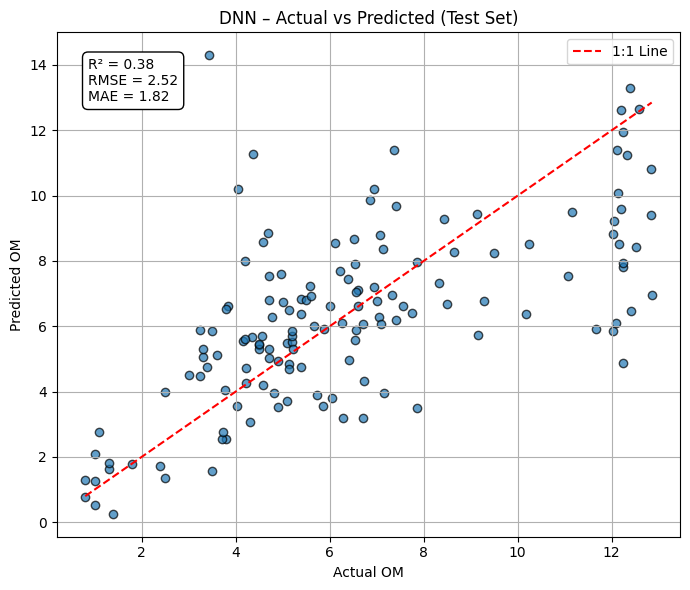

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Load data
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_m['OM']

# Drop rows with NaNs
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long','Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test (80/20)
X_train_full, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# DNN builder function
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# ---------- 10-Fold Cross-Validation on Training Set ----------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_full), 1):
    X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
    y_train_fold, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    dnn = build_dnn(X_train.shape[1])
    dnn.fit(X_train, y_train_fold, epochs=100, batch_size=16, verbose=2, validation_split=0.2)

    y_val_pred = dnn.predict(X_val).flatten()

    mbe = np.mean(y_val_pred - y_val)
    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)

    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Average training CV metrics
print(f"\n📊 DNN – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# ---------- Final Evaluation on Unseen Test Set ----------
final_dnn = build_dnn(X_train_full.shape[1])
final_dnn.fit(X_train_full, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)
y_test_pred = final_dnn.predict(X_test).flatten()

test_mbe = np.mean(y_test_pred - y_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n🧪 DNN – Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ---------- Optional: Plot Actual vs Predicted for Test Set ----------
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("DNN – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


WITH RFE DEEP NEURAL NETWORK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor  # For feature selection

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM' ])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using RFE with RandomForestRegressor
feature_selector = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=feature_selector, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Define function to build the DNN model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the DNN model
    dnn = build_dnn(X_train.shape[1])
    dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

    # Predict on test set
    y_pred = dnn.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Deep Neural Network (DNN)")
print(f"Setup: {'Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dnn_rfe = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model: Deep Neural Network (DNN)
Setup: Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=-0.2272, MAE=1.9135, RMSE=2.6910, R²=0.1904


withcv_test RFE DEEP


✅ Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

📊 DNN – 10-Fold Cross-Validation (Train Set):
MBE:  -0.0175
MAE:  1.6381
RMSE: 2.2504
R²:   0.4078


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

🧪 DNN – Final Evaluation on Unseen Test Set:
MBE:  0.0021
MAE:  1.7197
RMSE: 2.5475
R²:   0.3682


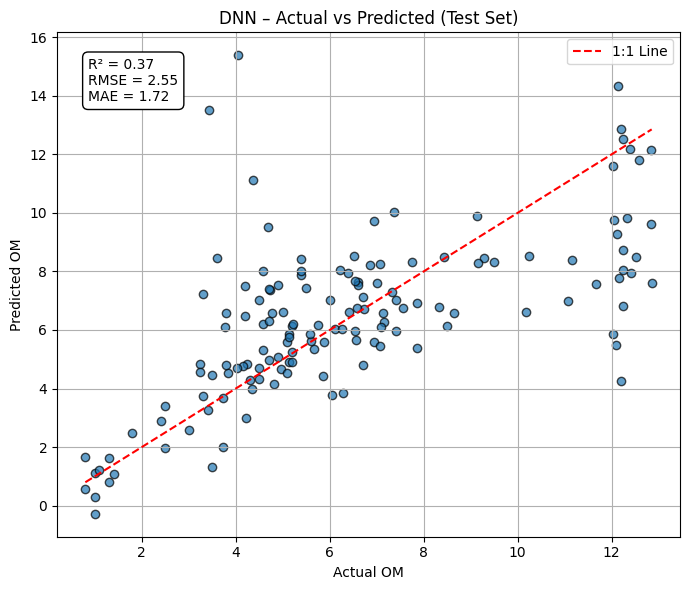

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor  # For feature selection

# Load and clean data
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_m['OM']

df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_cleaned['OM']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split (80/20)
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# RFE Feature Selection on training set only
feature_selector = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
num_features_to_select = int(0.9 * X.shape[1])
rfe = RFE(estimator=feature_selector, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Apply feature selection
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# Define DNN architecture
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# ----------- 10-Fold CV on Training Set -----------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    dnn = build_dnn(X_cv_train.shape[1])
    dnn.fit(X_cv_train, y_cv_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

    y_cv_pred = dnn.predict(X_cv_val).flatten()

    mbe = np.mean(y_cv_pred - y_cv_val)
    mae = mean_absolute_error(y_cv_val, y_cv_pred)
    rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
    r2 = r2_score(y_cv_val, y_cv_pred)

    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

print(f"\n📊 DNN – 10-Fold Cross-Validation (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# ----------- Final Training on Full Training Set and Test Evaluation -----------
final_dnn = build_dnn(X_train.shape[1])
final_dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

y_test_pred = final_dnn.predict(X_test).flatten()

test_mbe = np.mean(y_test_pred - y_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n🧪 DNN – Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# ---------- Store predictions from test set ----------
df_dnn_rfe = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_test_pred
})

# ---------- Plot Actual vs Predicted ----------
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("DNN – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ARTIFICAL NEURAL NETWORK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM',  'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to build the ANN model
def build_ann(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the ANN model
    ann = build_ann(X_train.shape[1])
    ann.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

    # Predict on test set
    y_pred = ann.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Artificial Neural Network (ANN)")
print(f"Setup: {'Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ann = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model: Artificial Neural Network (ANN)
Setup: Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV:
MBE=-0.3815, MAE=1.6800, RMSE=2.5181, R²=0.2764


cv_test_ANN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

📊 ANN – 10-Fold CV (Train Set):
MBE:  -0.0073
MAE:  1.7235
RMSE: 2.3852
R²:   0.3332


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

🧪 ANN – Final Evaluation on Unseen Test Set:
MBE:  -0.1718
MAE:  1.9428
RMSE: 2.9107
R²:   0.1753


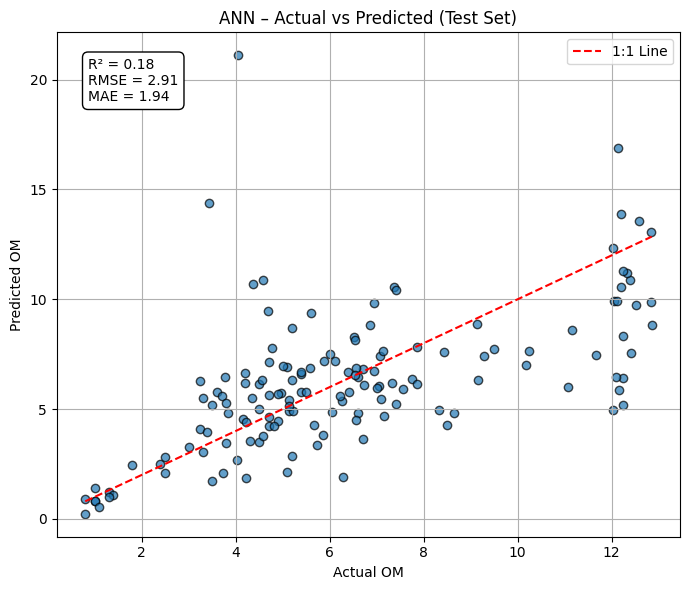

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaN values in X or y
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train and Test sets
X_train_full, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to build the ANN model
def build_ann(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# --- 10-Fold Cross-Validation on Training Set ---
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_index, val_index in kf.split(X_train_full):
    X_cv_train, X_cv_val = X_train_full[train_index], X_train_full[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

    ann = build_ann(X_cv_train.shape[1])
    ann.fit(X_cv_train, y_cv_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

    y_cv_pred = ann.predict(X_cv_val).flatten()

    mbe = np.mean(y_cv_pred - y_cv_val)
    mae = mean_absolute_error(y_cv_val, y_cv_pred)
    rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
    r2 = r2_score(y_cv_val, y_cv_pred)

    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Print average CV metrics
print(f"\n📊 ANN – 10-Fold CV (Train Set):")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# --- Final Training on Full Training Set + Test Evaluation ---
final_ann = build_ann(X_train_full.shape[1])
final_ann.fit(X_train_full, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

y_test_pred = final_ann.predict(X_test).flatten()

test_mbe = np.mean(y_test_pred - y_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n🧪 ANN – Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# --- Create DataFrame with Final Test Predictions ---
df_ann = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_test_pred
})

# --- Optional: Plot Actual vs Predicted for Test Set ---
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("ANN – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


WITH RFE ANN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor  # For feature selection

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM' ])  # Features
y = df_m['OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using RFE with RandomForestRegressor
feature_selector = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Set the number of features to select (90% of total features)
num_features_to_select = int(0.9 * X.shape[1])

# Perform Recursive Feature Elimination (RFE) with a fixed number of features
rfe = RFE(estimator=feature_selector, n_features_to_select=num_features_to_select)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Top 90% Features ({len(selected_features)} out of {X.shape[1]}):")
print(selected_features.tolist())

# Reduce X_scaled to selected features
X_selected = X_scaled[:, rfe.support_]

# Define function to build the ANN model
def build_ann(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation using selected features
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the ANN model
    ann = build_ann(X_train.shape[1])
    ann.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

    # Predict on test set
    y_pred = ann.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Artificial Neural Network (ANN)")
print(f"Setup: {'Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV (with 90% selected features):")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ann_rfe = pd.DataFrame({
    'Actual ': y_test.values,
    'Predicted ': y_pred
})

Selected Top 90% Features (27 out of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_5_20s', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model: Artificial Neural Network (ANN)
Setup: Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV (with 90% selected features):
MBE=-0.3139, MAE=1.7159, RMSE=2.5164, R²=0.2666


CV_TEST_WITH RFE ANN


✅ Selected Top 90% Features (27 of 30):
['Relative_Elev', 'Slope', 'Aspect', 'Profile_curva', 'Senti_BI_1', 'Senti_BI_2', 'Plant_BI_1', 'Plant_BI_2', 'Polaris_SC', 'Gnasco_SC', 'MRVBF', 'TWI', 'Clay_polaris', 'SAND_Polaris', 'SILT_Polaris', 'BD_Polaris', 'PH_Polaris', 'rootznaws', 'pctearthmc', 'ncci3all', 'aws_0_20s', 'Alpha_Polaris', 'HB_Polaris', 'Ksat_Polaris', 'Lamda_Polaris', 'n_Polaris', 'Theta_r_Polaris']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

📊 ANN – 10-Fold Cross-Validation on Training Set:
MBE:  0.0363
MAE:  1.6275
RMSE: 2.2498
R²:   0.4080


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

🧪 ANN – Final Evaluation on Unseen Test Set:
MBE:  0.3027
MAE:  1.9147
RMSE: 2.8212
R²:   0.2252


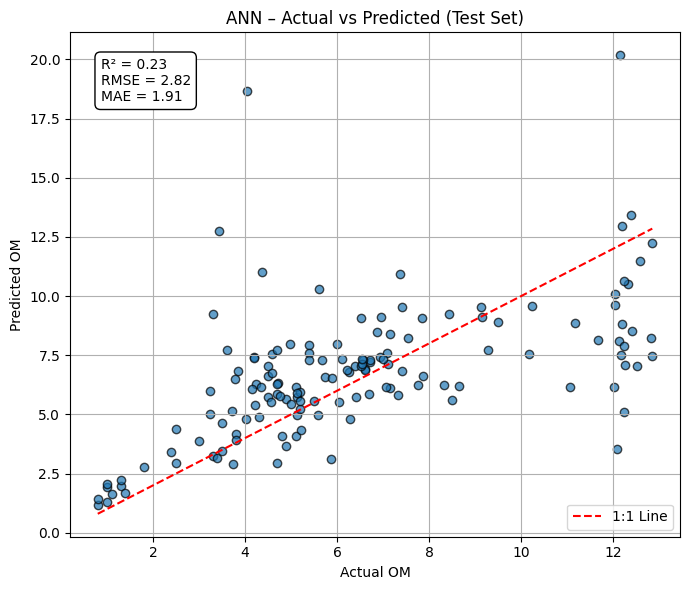

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor  # For feature selection

# Prepare data
X = df_m.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_m['OM']

# Drop rows with NaN values
df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist())
X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','long', 'Sensor_OM'])
y = df_cleaned['OM']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# RFE on training set
feature_selector = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
num_features_to_select = int(0.9 * X.shape[1])
rfe = RFE(estimator=feature_selector, n_features_to_select=num_features_to_select)
rfe.fit(X_train_full, y_train)

selected_features = X.columns[rfe.support_]
print(f"\n✅ Selected Top 90% Features ({len(selected_features)} of {X.shape[1]}):")
print(selected_features.tolist())

# Apply selected features to train/test sets
X_train = X_train_full[:, rfe.support_]
X_test = X_test_full[:, rfe.support_]

# Define ANN builder
def build_ann(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# --- 10-Fold CV on training set ---
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mbe_list, mae_list, rmse_list, r2_list = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    ann = build_ann(X_cv_train.shape[1])
    ann.fit(X_cv_train, y_cv_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

    y_cv_pred = ann.predict(X_cv_val).flatten()

    mbe = np.mean(y_cv_pred - y_cv_val)
    mae = mean_absolute_error(y_cv_val, y_cv_pred)
    rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
    r2 = r2_score(y_cv_val, y_cv_pred)

    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

print(f"\n📊 ANN – 10-Fold Cross-Validation on Training Set:")
print(f"MBE:  {np.mean(mbe_list):.4f}")
print(f"MAE:  {np.mean(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f}")

# --- Final model on full training set, evaluate on test set ---
final_ann = build_ann(X_train.shape[1])
final_ann.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

y_test_pred = final_ann.predict(X_test).flatten()

test_mbe = np.mean(y_test_pred - y_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n🧪 ANN – Final Evaluation on Unseen Test Set:")
print(f"MBE:  {test_mbe:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²:   {test_r2:.4f}")

# Create dataframe with final test results
df_ann_rfe = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_test_pred
})

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='1:1 Line')
plt.xlabel("Actual OM")
plt.ylabel("Predicted OM")
plt.title("ANN – Actual vs Predicted (Test Set)")

plt.text(0.05, 0.95,
         f"R² = {test_r2:.2f}\nRMSE = {test_rmse:.2f}\nMAE = {test_mae:.2f}",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PLOTTING

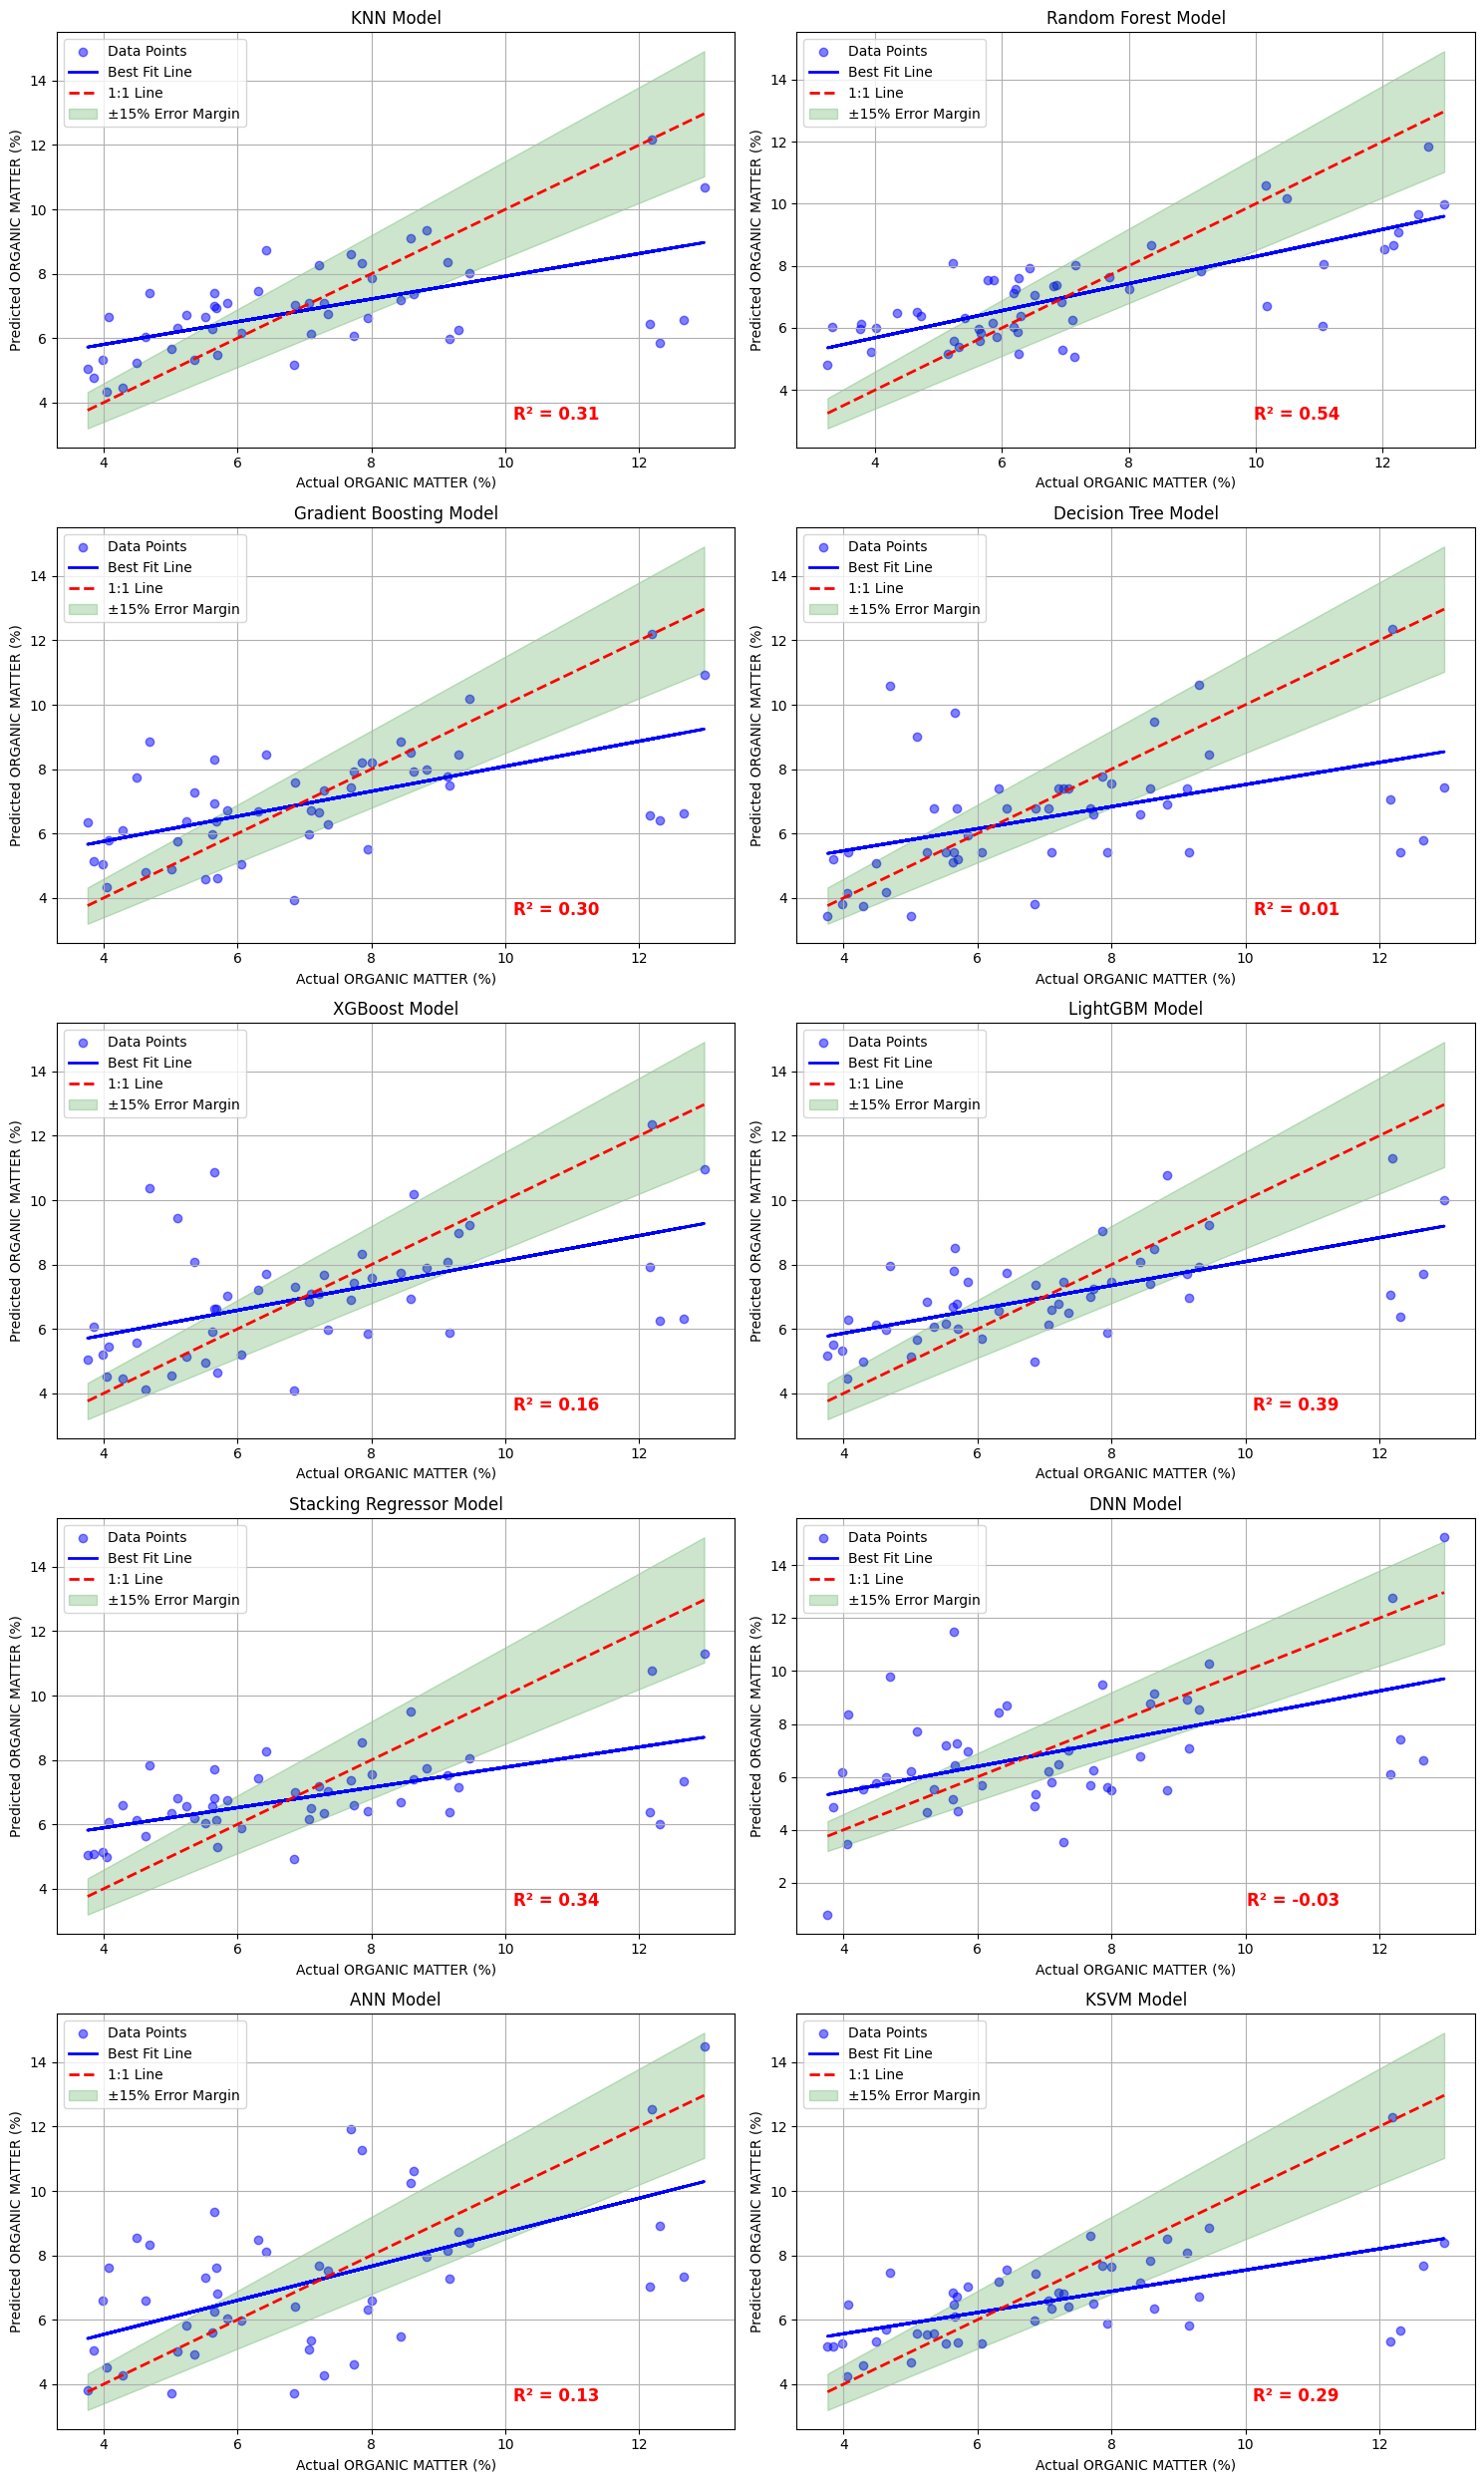

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Define a function to create scatter plots for each model with best-fit line, 1:1 line, and ±20% shaded area
def plot_scatter(df_dict):
    num_models = len(df_dict)

    # Determine number of rows and columns for subplots dynamically
    rows = (num_models // 2) + (num_models % 2)  # 2 plots per row
    cols = 2 if num_models > 1 else 1  # Use 1 column if only 1 model

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten() if num_models > 1 else [axes]  # Handle single plot


    # Iterate through each model and plot
    for i, (name, df) in enumerate(df_dict.items()):
        # Access the correct column names for actual and predicted values
        actual_col = 'Actual Yield'  # Use 'Actual Yield' if available, otherwise fallback to 'Actual OM'
        predicted_col = 'Predicted Yield'  # Use 'Predicted Yield' if available, otherwise fallback to 'Predicted OM'

        if 'Actual OM' in df.columns:
            actual_col = 'Actual OM'
        if 'Predicted OM' in df.columns:
            predicted_col = 'Predicted OM'

    # Iterate through each model and plot
    for i, (name, df) in enumerate(df_dict.items()):

        # Scatter plot of actual vs predicted yields
        axes[i].scatter(df[actual_col], df[predicted_col], color='blue', alpha=0.5, label='Data Points')

        # Best-fit regression line
        X_actual = df[actual_col].values.reshape(-1, 1)
        y_predicted = df[predicted_col].values
        reg = LinearRegression().fit(X_actual, y_predicted)
        best_fit_y = reg.predict(X_actual)
        axes[i].plot(df[actual_col], best_fit_y, color='blue', lw=2, linestyle='-', label='Best Fit Line')

        # Plot the 1:1 line (perfect prediction line)
        min_val, max_val = min(df[actual_col]), max(df[actual_col])
        axes[i].plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--', label='1:1 Line')

        # Add shaded ±20% error margin area
        axes[i].fill_between([min_val, max_val],
                             [min_val * 1.15, max_val * 1.15],
                             [min_val * 0.85, max_val * 0.85],
                             color='green', alpha=0.2, label='±15% Error Margin')

        # Calculate R² value
        r2 = r2_score(df[actual_col], df[predicted_col])

        # Set title with R² value
        axes[i].set_title(f'{name} Model')

        # Display R² score in the top right corner with custom text style
        axes[i].text(0.80, 0.10, f'R² = {r2:.2f}', transform=axes[i].transAxes,
                     ha='right', va='top', fontsize=12, color='red', weight='bold')

        # Labels, grid, and legend
        axes[i].set_xlabel('Actual ORGANIC MATTER (%)')
        axes[i].set_ylabel('Predicted ORGANIC MATTER (%)')
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Create a dictionary to store DataFrames for each model
df_dict = {
    'KNN': df_knn,
    'Random Forest': df_rf,
    'Gradient Boosting': df_gb,
    'Decision Tree': df_dt,
    'XGBoost': df_xgb,
    'LightGBM': df_lgb,
    'Stacking Regressor': df_sr,
    'DNN': df_dnn,
    'ANN': df_ann,
    'KSVM': df_ksvm  # Added Kernelized Support Vector Machines (KSVM)
}

# Now call the plot function to generate the scatter plots for all models
plot_scatter(df_dict)